<a href="https://colab.research.google.com/github/SAYEDALISINA93/AnalysisWork/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import user_load_util
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
# Define data location for the user food app data
user_location = './'

# Define output path
data_path = './data'

# Load & Preprocess data

In [ ]:
# Load user data
user_data = user_load_util.load_user_data(user_location)

# Serialize question choices
user_data['question'] = user_load_util.serialize_question_choices(user_data['question'])

In [ ]:
# Name some data
recipes_df = user_data['minimized_recipes']
interaction_df = user_data['food_recipeintake']

In [ ]:
# Create question map
question_map = (user_data['question'].groupby('question_id')
                .apply(lambda group: {'question': group['question'].iloc[0],
                                      'choices': group['choices'].iloc[0]
                                      })
                .to_dict())

In [ ]:
# Create user-recipe interaction data merged with the recipe data
merged_df = pd.merge(interaction_df, recipes_df[['new_recipe_id', 'nutri_score', 'who_score', 'fsa_score']],
                     left_on='recipe_id', right_on='new_recipe_id', how='left')
merged_df = merged_df.assign(nutri_score_2=merged_df['nutri_score'].apply(
    lambda x: 'A' if x >= 1 else 'B' if x >= 0.75 else 'C' if x >= 0.5 else 'D' if x >= 0.25 else 'E'))

# Define the custom order of categories
custom_order = ['A', 'B', 'C', 'D', 'E']

# Convert 'merged_df' to Categorical with custom order
merged_df['nutri_score_2'] = pd.Categorical(merged_df['nutri_score_2'], categories=custom_order, ordered=True)

# Visualize data

<ipython-input-35-a3e22bc0c3f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutri_score_counts.index, y=nutri_score_counts.values, palette=[colors[key] for key in nutri_score_counts.index])


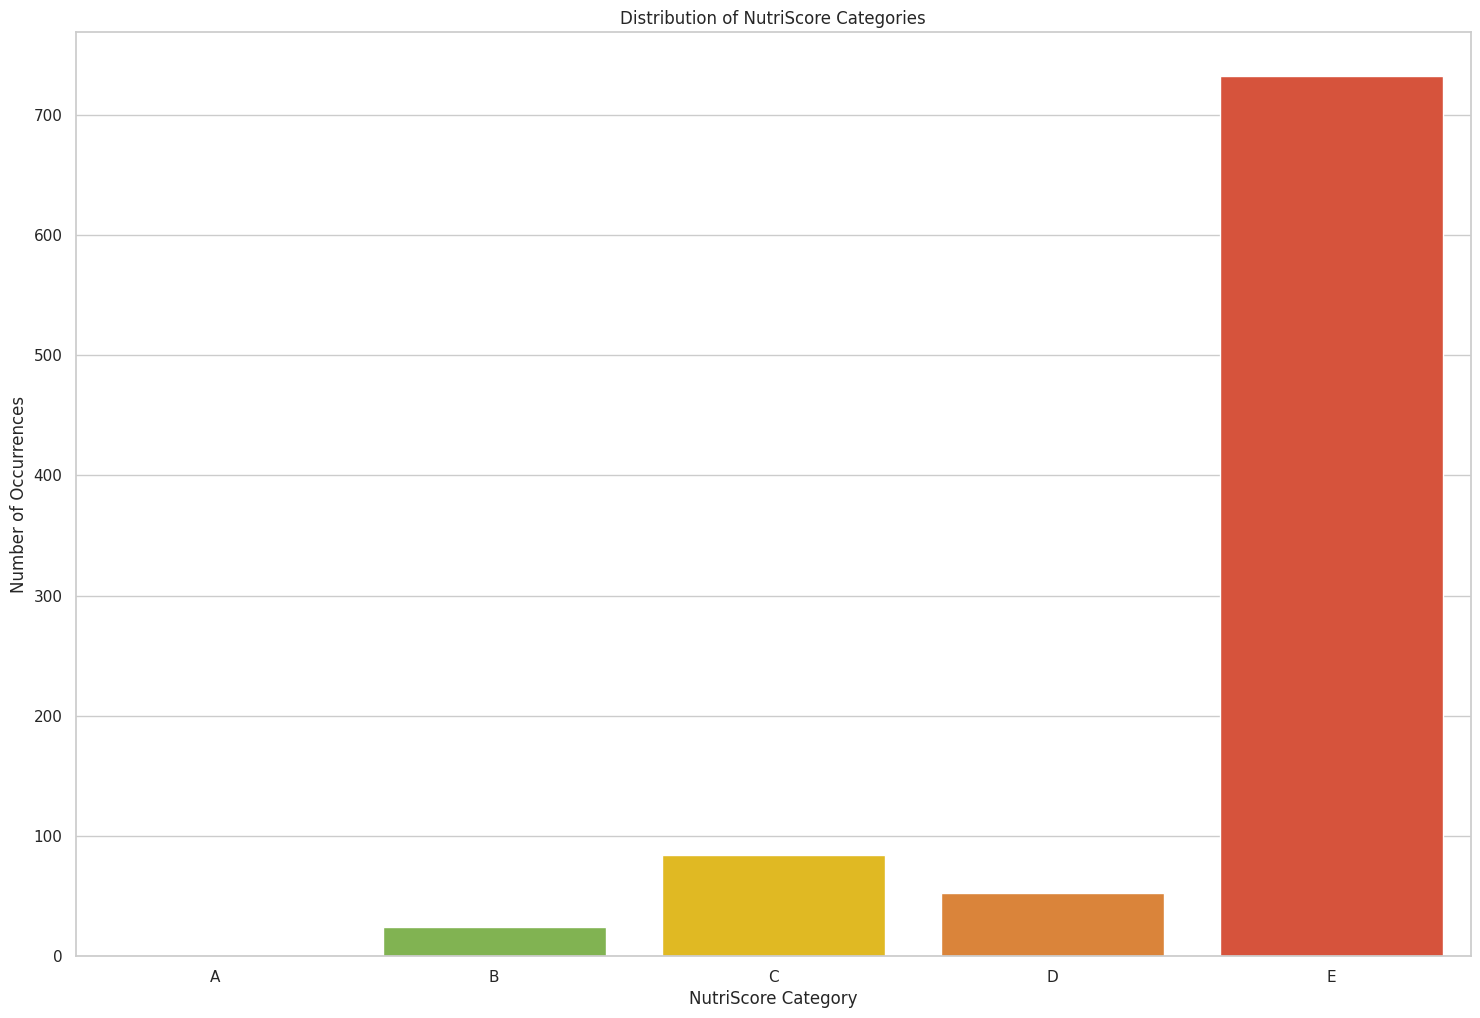

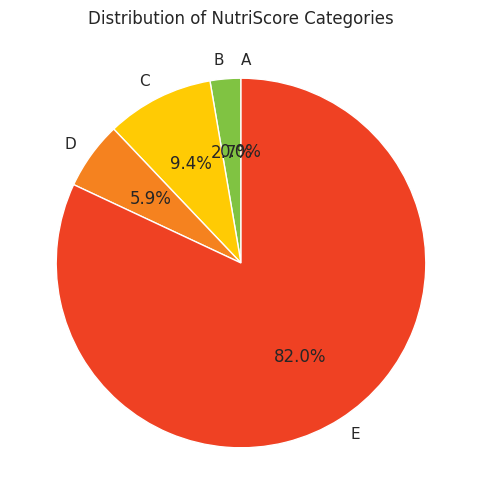

In [ ]:
# Pie chart for NUTRI score
# Define colors for each NutriScore category

# Define colors for each NutriScore category
colors = {'A': '#008A4B', 'B': '#80C342', 'C': '#FFCB04', 'D': '#F5821F', 'E': '#EF4123'}

# Count the occurrences of each nutri score category
nutri_score_counts = merged_df['nutri_score_2'].value_counts().reindex(custom_order)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the distribution as bar chart
plt.figure(figsize=(18, 12))
sns.barplot(x=nutri_score_counts.index, y=nutri_score_counts.values, palette=[colors[key] for key in nutri_score_counts.index])
plt.xlabel('NutriScore Category')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of NutriScore Categories')
plt.show()

# Plot the distribution as pie chart
plt.figure(figsize=(9, 6))
plt.pie(x=nutri_score_counts.values, labels=nutri_score_counts.index, autopct='%1.1f%%',
        startangle=90, colors=[colors[key] for key in nutri_score_counts.index])
plt.title('Distribution of NutriScore Categories')
plt.show()

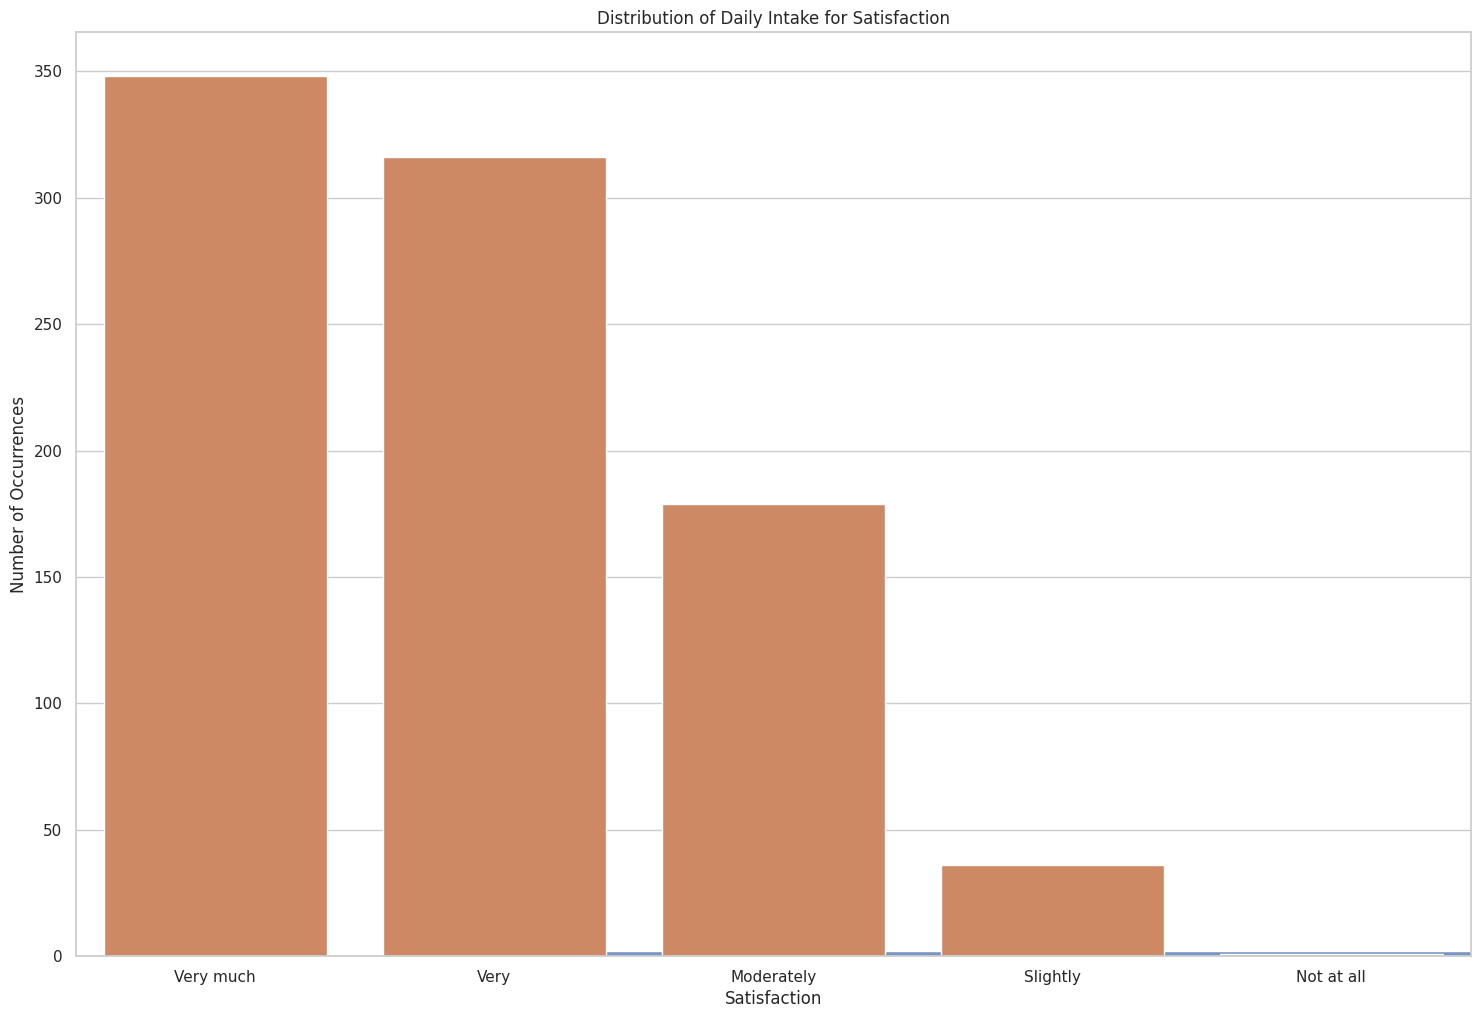

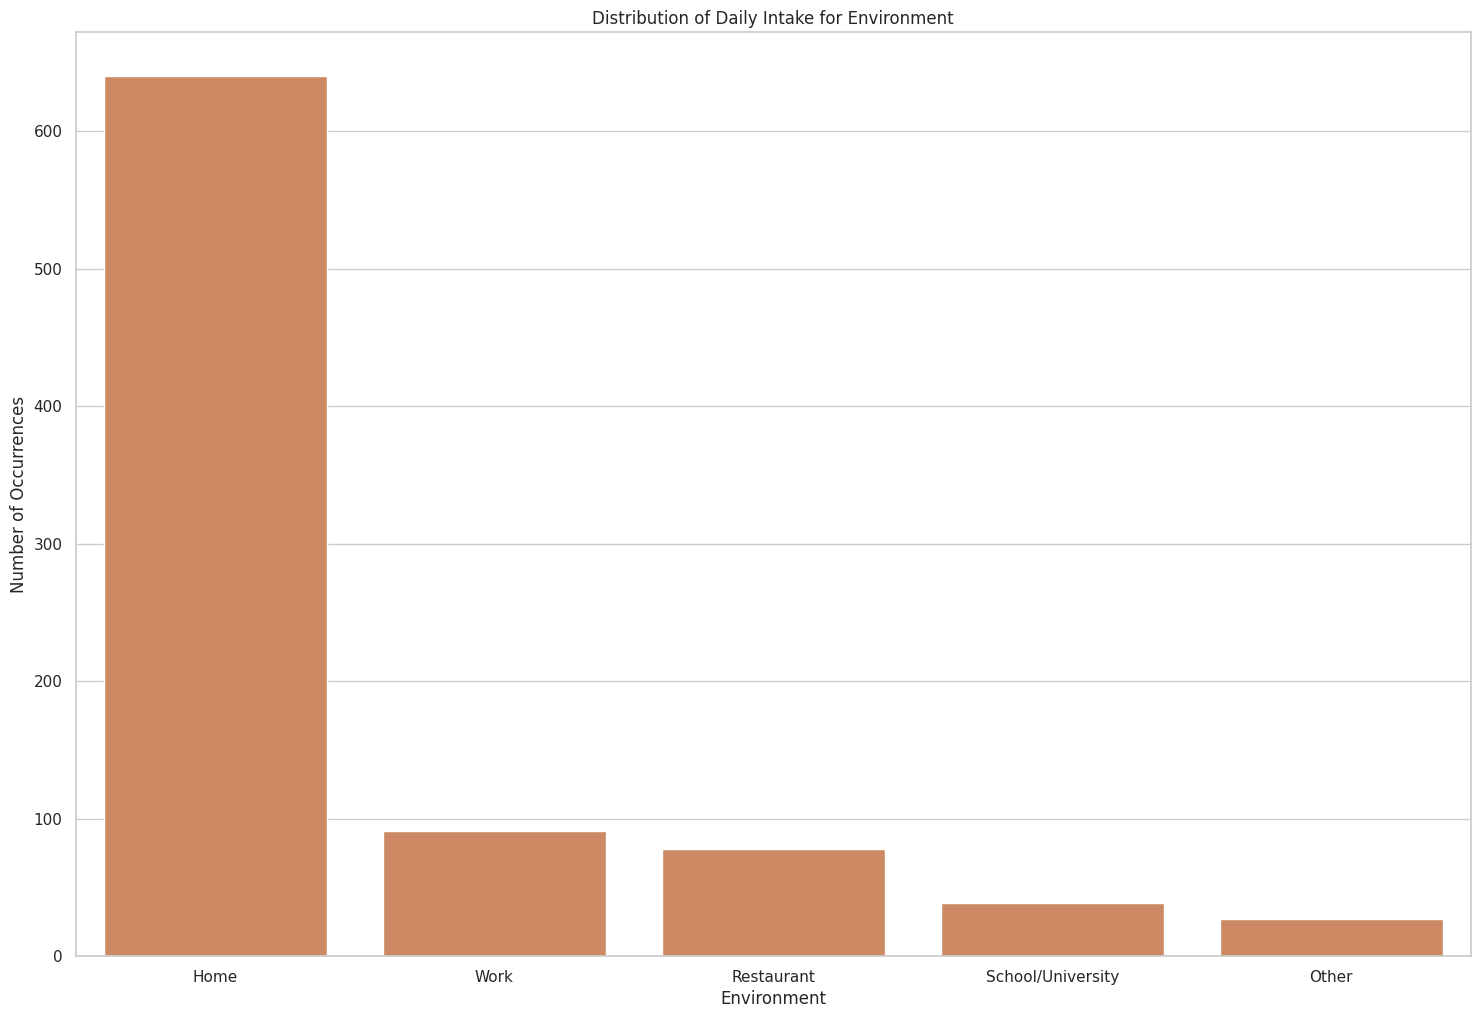

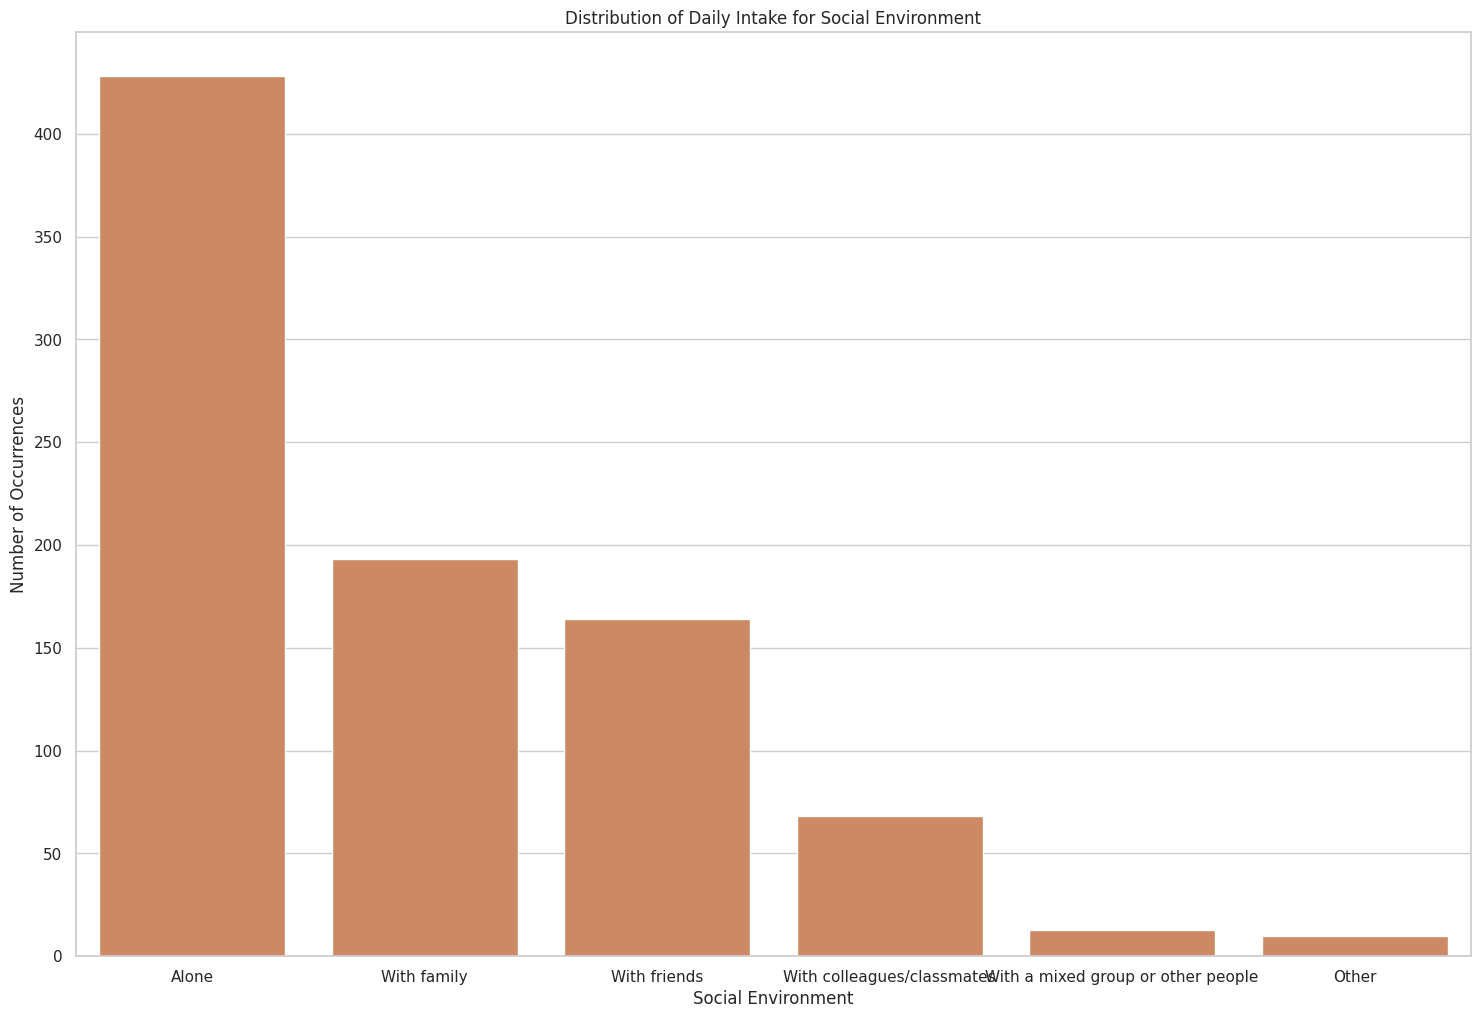

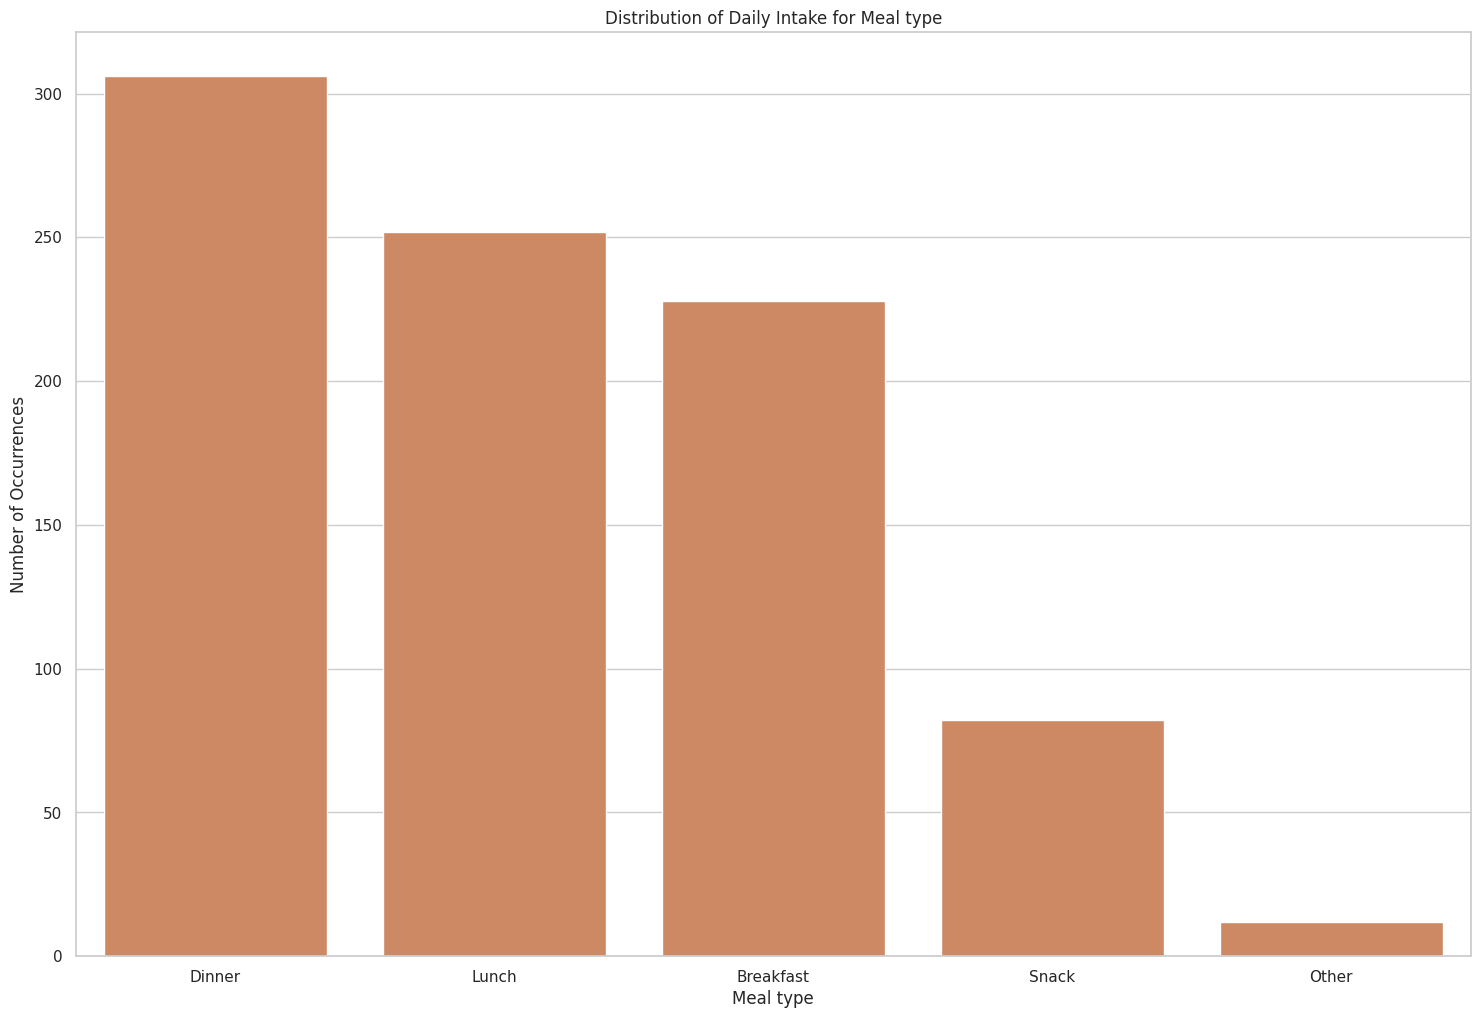

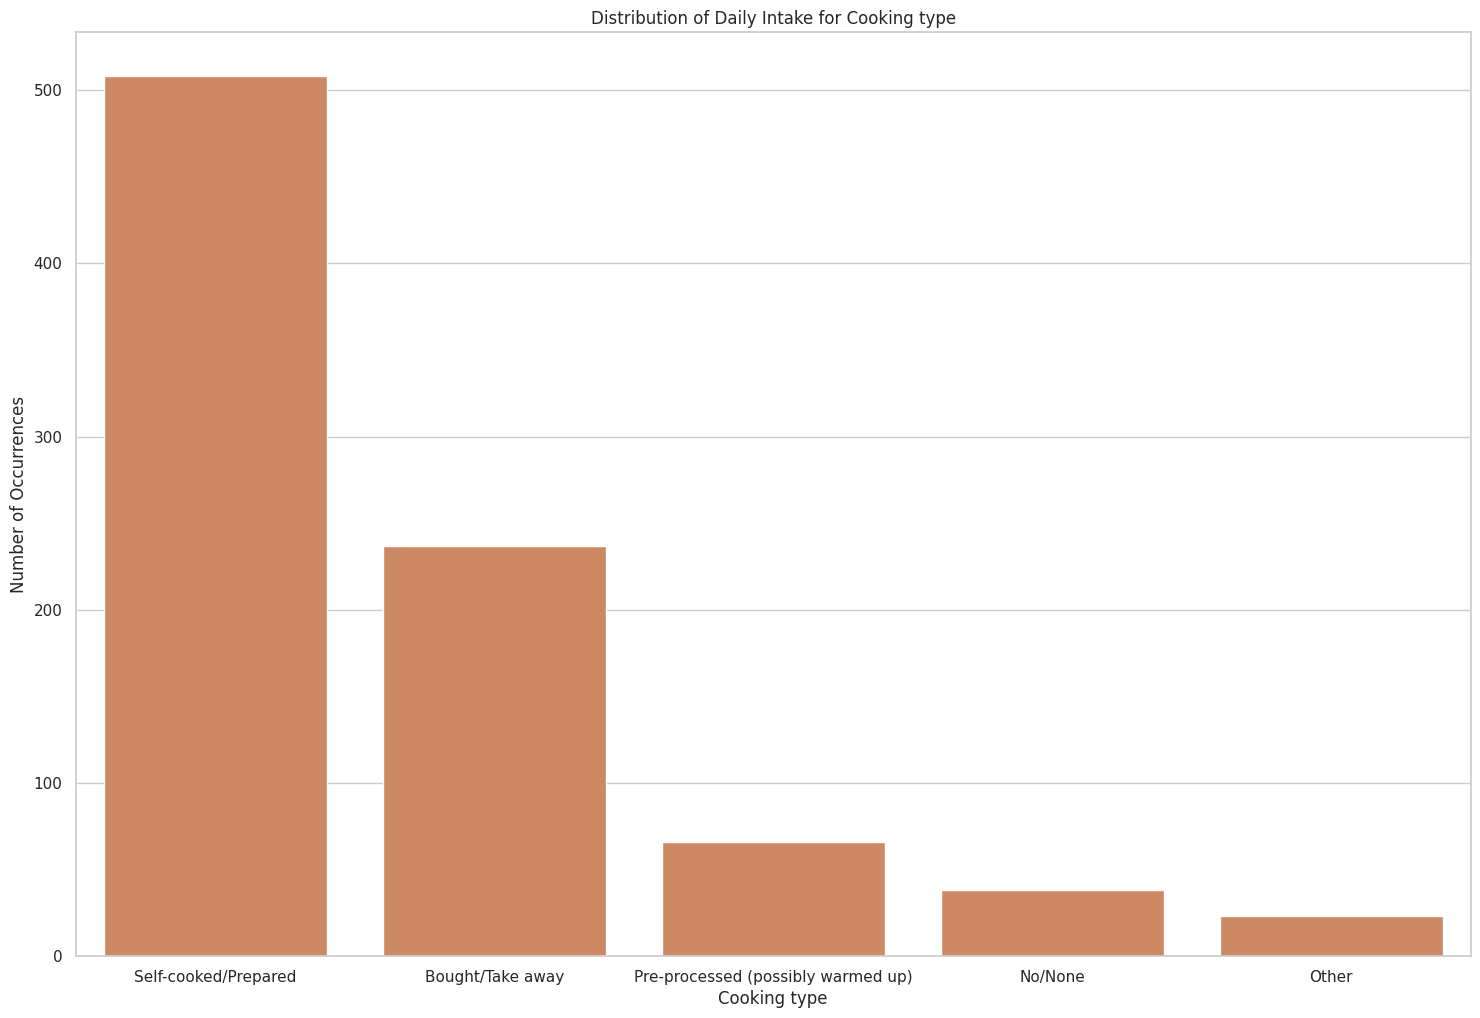

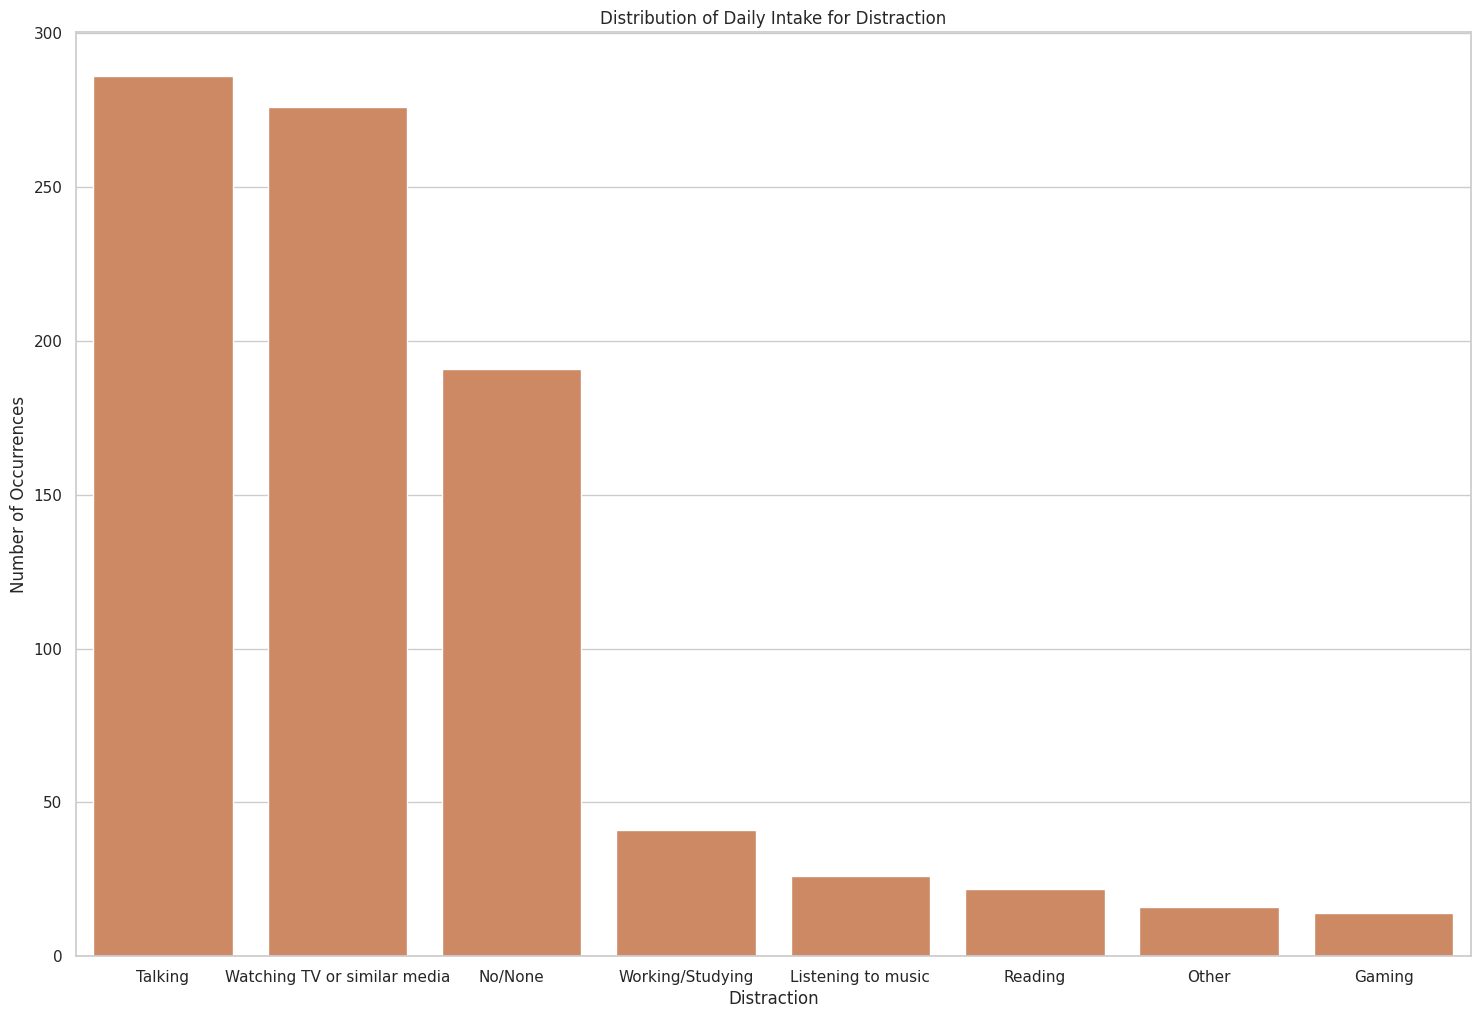

In [ ]:
# Visualize daily intake stats
categories = {'SAT':'Satisfaction', 'ENV':'Environment', 'SENV':'Social Environment', 'MT': 'Meal type', 'CT': 'Cooking type', 'DIST':'Distraction'}
for category, description in categories.items():
    mapped_data = interaction_df[category].map(question_map[category]['choices']).value_counts()
    plt.figure(figsize=(18, 12))
    sns.histplot(mapped_data, kde=False)
    sns.barplot(x=mapped_data.index, y=mapped_data.values)
    plt.xlabel(description)
    plt.ylabel('Number of Occurrences')
    plt.title('Distribution of Daily Intake for {}'.format(description))
    plt.show()

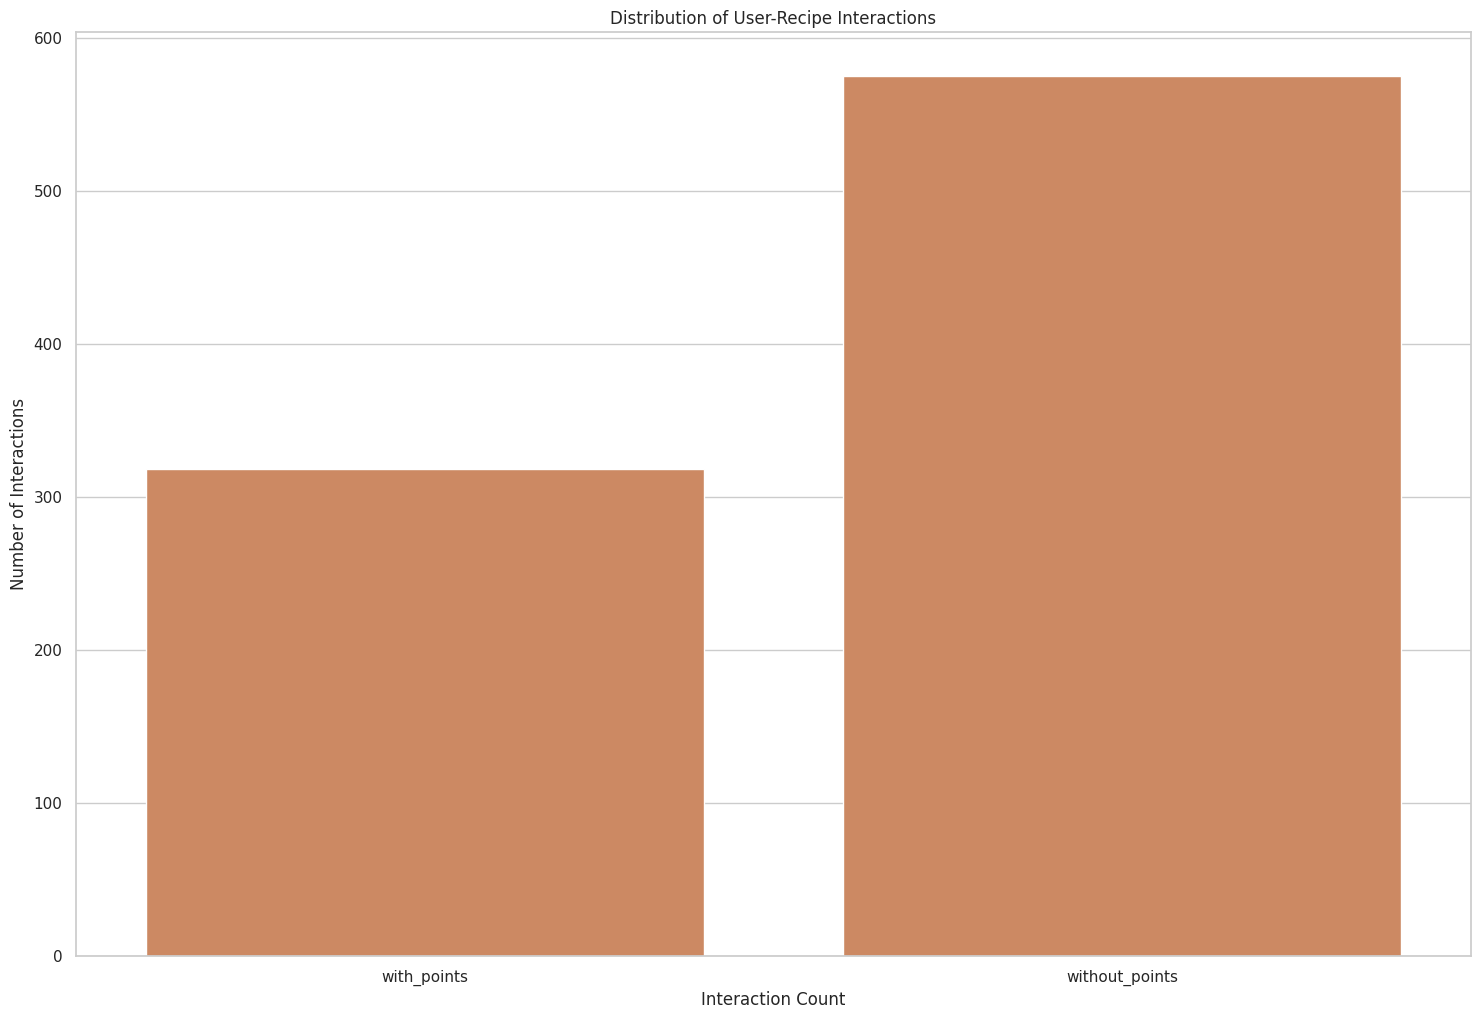

In [ ]:
# Visualize Gamification: Points
users_with_points = user_data['user_config'][user_data['user_config']['use_points']==True]['user_id']
users_without_points = user_data['user_config'][user_data['user_config']['use_points']==False]['user_id']

interaction_with_points = interaction_df[interaction_df['user_id'].isin(users_with_points)]
interaction_without_points = interaction_df[interaction_df['user_id'].isin(users_without_points)]

interaction_counts = {'with_points': [len(interaction_with_points)],
                      'without_points': [len(interaction_without_points)]}

interaction_counts_df = pd.DataFrame.from_dict(interaction_counts).T.squeeze()

plt.figure(figsize=(18, 12))
sns.histplot(interaction_counts_df, kde=False)
sns.barplot(x=interaction_counts_df.index, y=interaction_counts_df.values)
plt.xlabel('Interaction Count')
plt.ylabel('Number of Interactions')
plt.title('Distribution of User-Recipe Interactions')
plt.show()

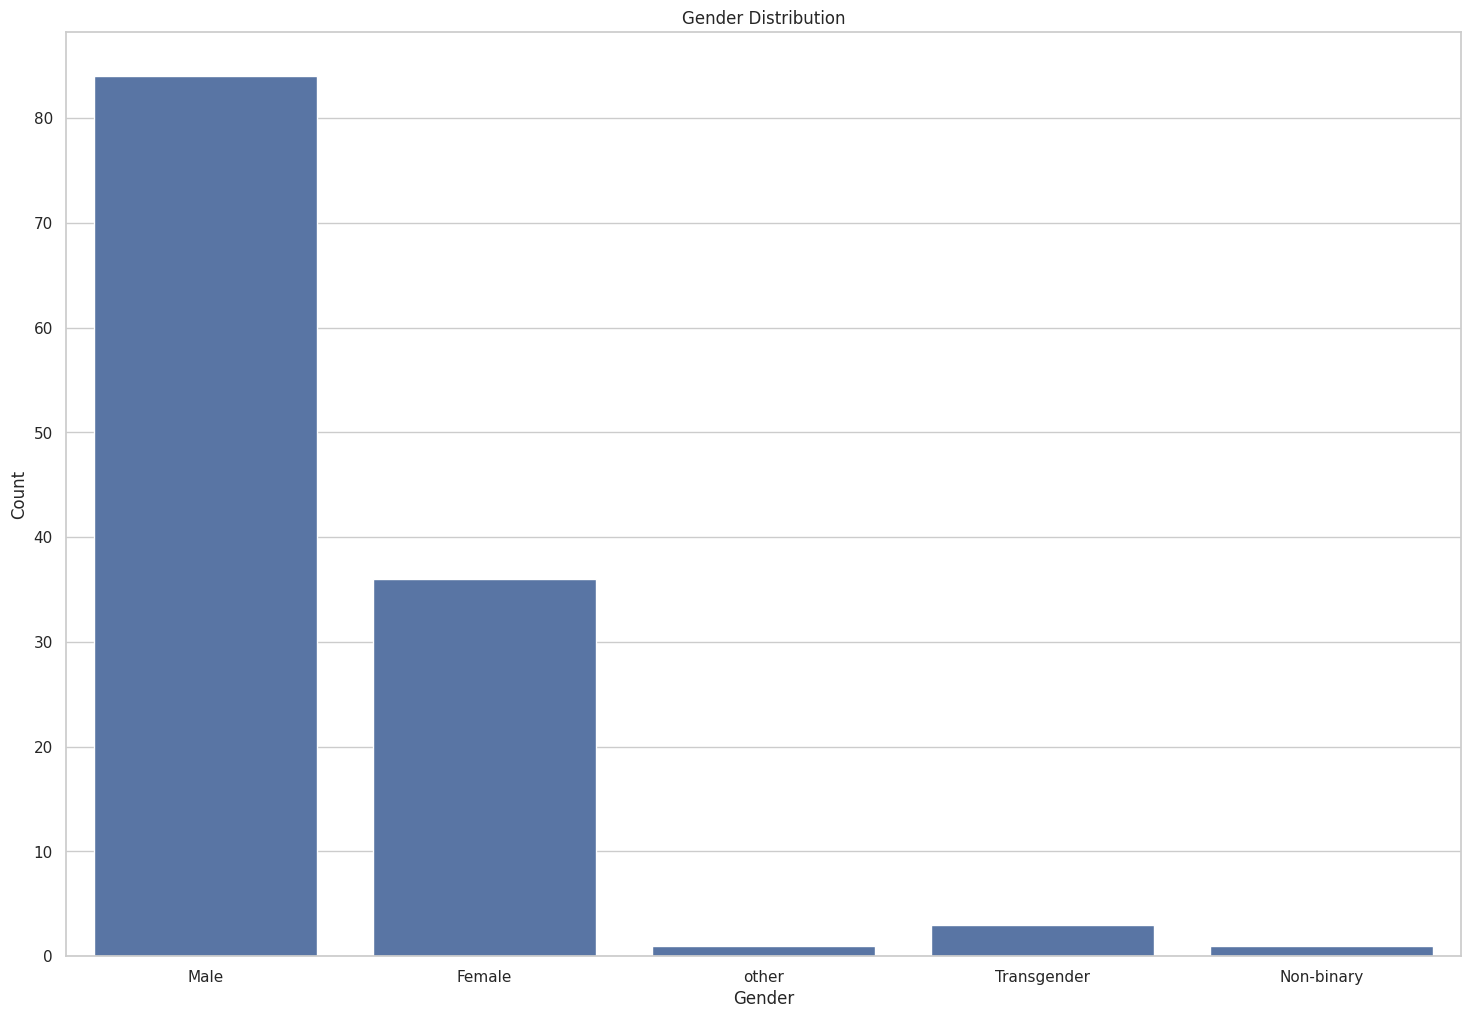

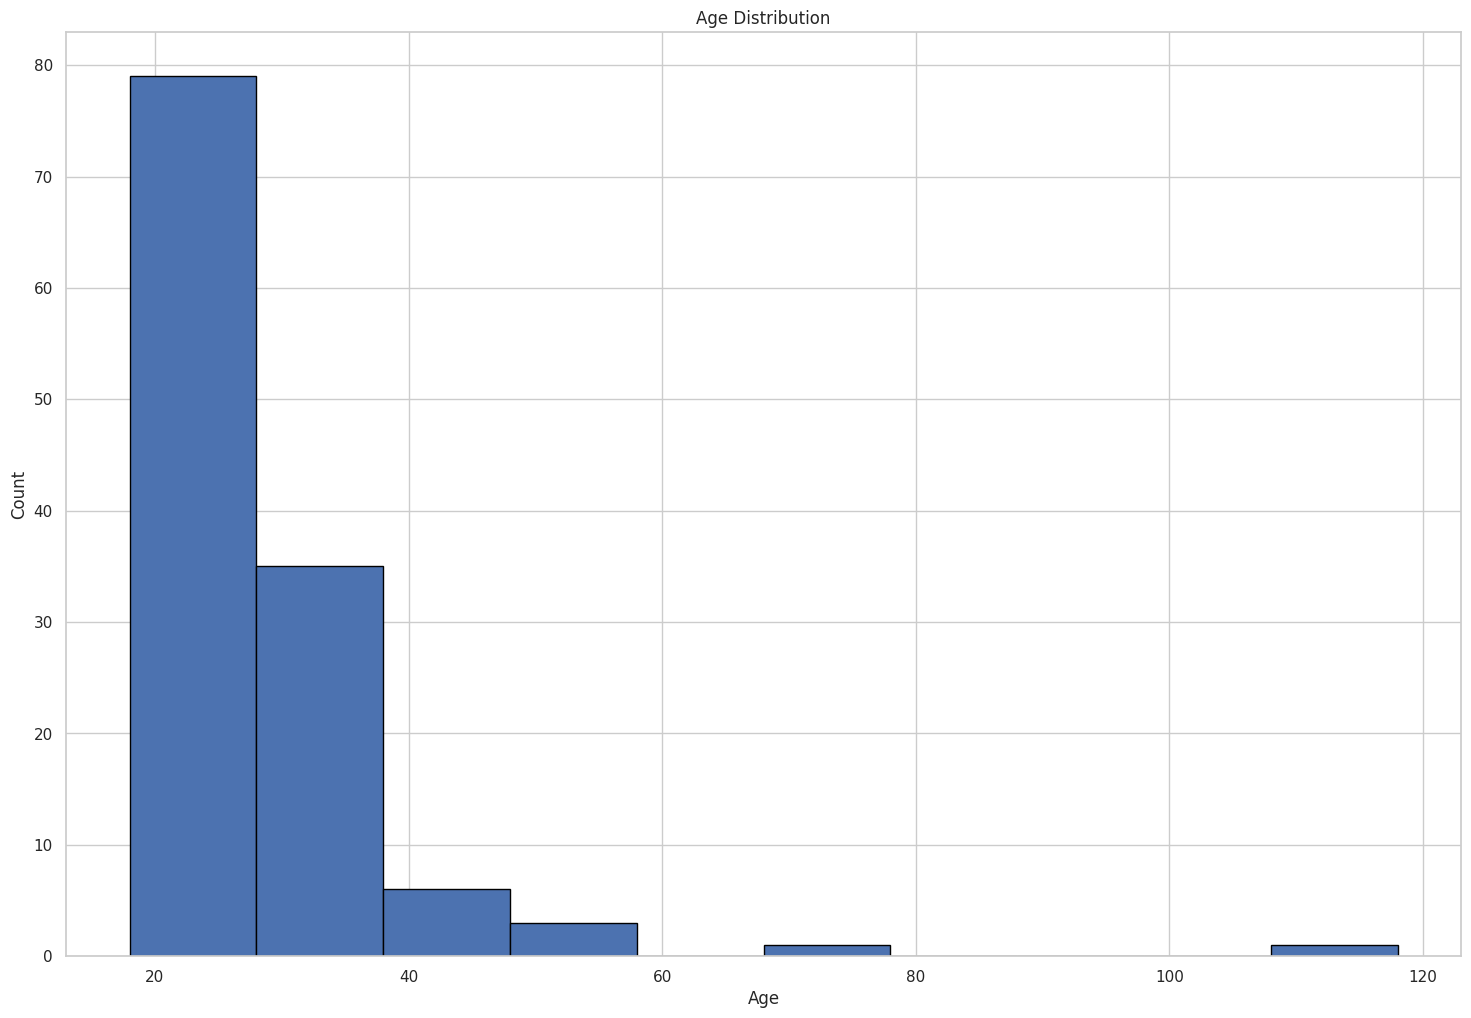

In [ ]:
# Visualize User Profiles: Gender & Age
# Visualize the 'gender' column with a bar chart
##NOTE: THERE WERE NO GENDER AND AGE IN ANONYMIZED_USER_PROFILE SO I CHANGED TO OUTPUT_DATASET
user_gender_counts = user_data['output_dataset']['sex'].dropna().value_counts()
# user_gender_counts
plt.figure(figsize=(18, 12))
sns.countplot(x='sex', data=user_data['output_dataset'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize the 'age' column with a histogram
plt.figure(figsize=(18, 12))
###NOTE: SAME HERE
plt.hist(user_data['output_dataset']['age'], bins=10, edgecolor='black')
#sns.histplot(user_data['user_profile']['age'], bins=10, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Imapact Analysis

In [ ]:
# Visualize questionnaires
# TODO

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt

### Load and merge the data

In [ ]:
# Load the data from the provided CSV files
user_profile_df = pd.read_csv('./anonymized_user_profile.csv')
output_dataset_df = pd.read_csv('./output_dataset.csv')


# Merge the DataFrames on 'user_id'
merged_df = pd.merge(user_profile_df, output_dataset_df, on='user_id')

# Convert necessary columns to numeric, forcing errors to NaN
cols_to_convert = ['BMI', 'weight', 'body_fat', 'BMR', 'total_points']
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Define the independent and dependent variables
independent_vars = ['Breakfast', 'Lunch', 'Dinner']
dependent_vars = ['BMI', 'weight', 'body_fat', 'BMR', 'total_points']

# Drop rows with missing values in the relevant columns
merged_df_clean = merged_df.dropna(subset=independent_vars + dependent_vars)


# Ensure all relevant columns are numeric
for col in independent_vars + dependent_vars:
    merged_df_clean.loc[:, col] = pd.to_numeric(merged_df_clean[col], errors='coerce')

#### Tables

In [ ]:
# Function to get linear regression results as DataFrame
def get_linear_regression_results(dv):
    y = merged_df_clean[dv].astype(float)
    X = sm.add_constant(merged_df_clean[independent_vars].astype(float))
    model = sm.OLS(y, X).fit()
    results_df = pd.DataFrame({
        'Dependent Variable': [dv],
        'R-squared': [model.rsquared],
        'F-statistic': [model.fvalue],
        'Prob (F-statistic)': [model.f_pvalue],
        'Coefficients': [model.params.values],
        'P-values': [model.pvalues.values]
    })
    return results_df

# Function to get logistic regression results as DataFrame
def get_logistic_regression_results():
    merged_df_clean.loc[:, 'physical_activity_level_binary'] = merged_df_clean['physical_activity_level'].apply(lambda x: 1 if x > 1 else 0)
    y = merged_df_clean['physical_activity_level_binary'].astype(float)
    X = sm.add_constant(merged_df_clean[independent_vars].astype(float))
    model = sm.Logit(y, X).fit()
    results_df = pd.DataFrame({
        'Dependent Variable': ['physical_activity_level_binary'],
        'Pseudo R-squared': [model.prsquared],
        'Log-Likelihood': [model.llf],
        'Coefficients': [model.params.values],
        'P-values': [model.pvalues.values]
    })
    return results_df

# Function to get ANOVA results as DataFrame
def get_anova_results(dv):
    model = ols(f'{dv} ~ ' + ' + '.join([f'C({col})' for col in independent_vars]), data=merged_df_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    results_df = anova_table.reset_index()
    results_df.insert(0, 'Dependent Variable', dv)
    return results_df

# Collect regression results in one table
regression_results = pd.DataFrame()
for dv in dependent_vars:
    linear_regression_results = get_linear_regression_results(dv)
    regression_results = pd.concat([regression_results, linear_regression_results], axis=0)

# Add logistic regression results
logistic_regression_results = get_logistic_regression_results()
regression_results = pd.concat([regression_results, logistic_regression_results], axis=0)

# Collect ANOVA results in one table
anova_results = pd.DataFrame()
for dv in dependent_vars:
    anova_df = get_anova_results(dv)
    anova_results = pd.concat([anova_results, anova_df], axis=0)

# Display results
regression_results.reset_index(drop=True, inplace=True)
anova_results.reset_index(drop=True, inplace=True)

print("Regression Analysis Results")
print(regression_results)

print("\nANOVA Results")
print(anova_results)

Optimization terminated successfully.
         Current function value: 0.528222
         Iterations 5
Regression Analysis Results
               Dependent Variable  R-squared  F-statistic  Prob (F-statistic)  \
0                             BMI   0.013510     1.798666            0.146866   
1                          weight   0.020601     2.762520            0.041828   
2                        body_fat   0.015603     2.081702            0.102097   
3                             BMR   0.023985     3.227448            0.022522   
4                    total_points   0.006479     0.856433            0.463800   
5  physical_activity_level_binary        NaN          NaN                 NaN   

                                        Coefficients  \
0  [25.21805837082789, -1.159754405591092, -0.647...   
1  [77.92156862745092, -5.545224541429416, -2.744...   
2  [17.294117647058812, -1.9500316255534342, 0.38...   
3  [1708.2355784313709, -77.14421821631731, -38.8...   
4  [46.64705882352936,

<ipython-input-41-03de3646191e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean.loc[:, 'physical_activity_level_binary'] = merged_df_clean['physical_activity_level'].apply(lambda x: 1 if x > 1 else 0)


#### Charts

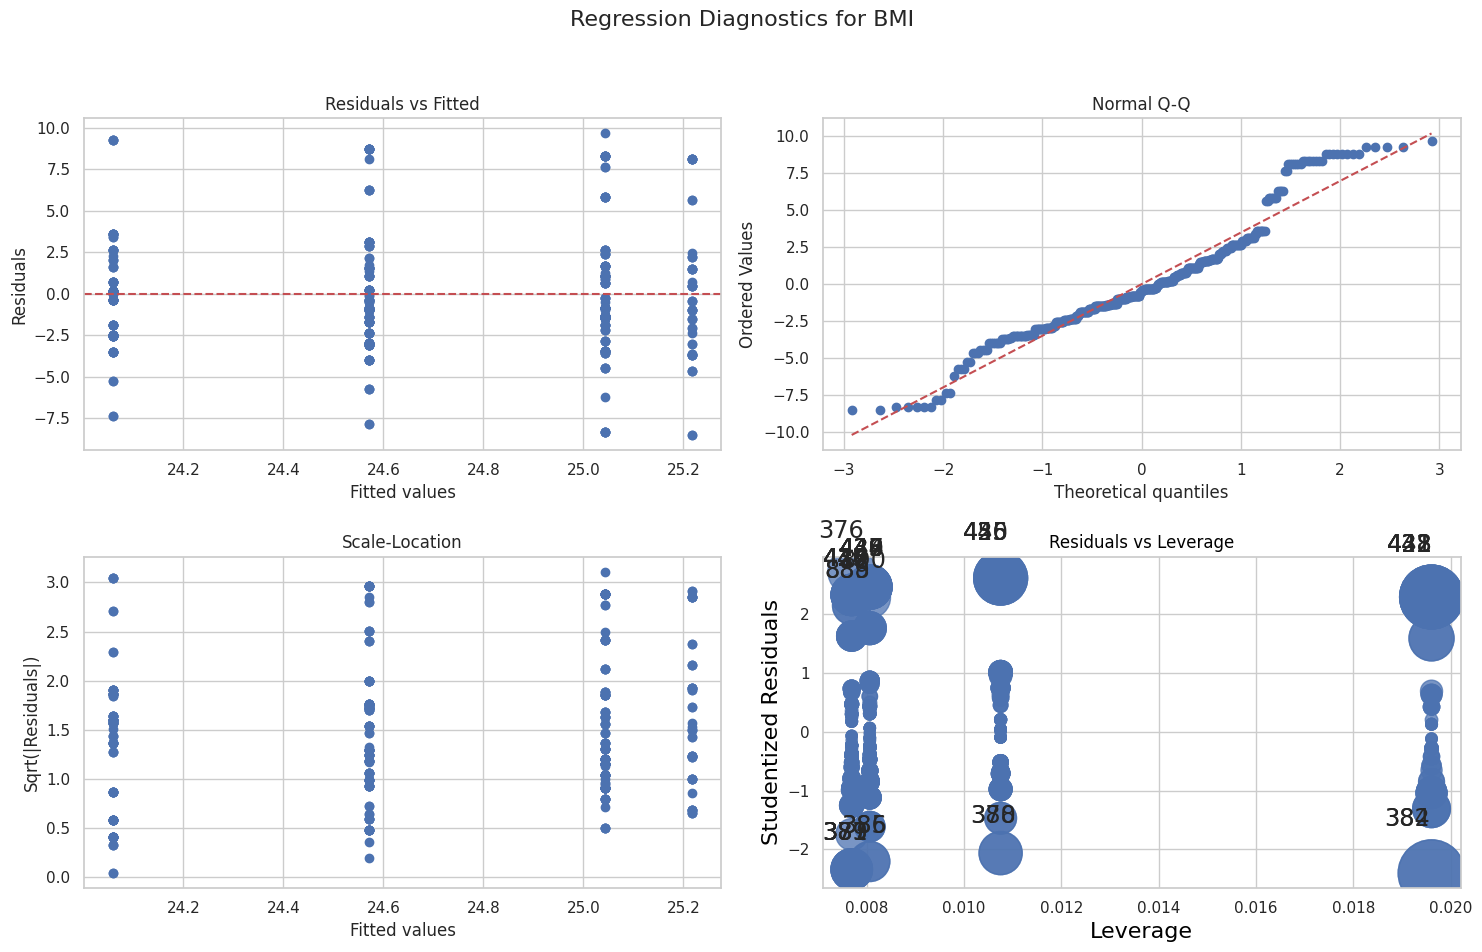

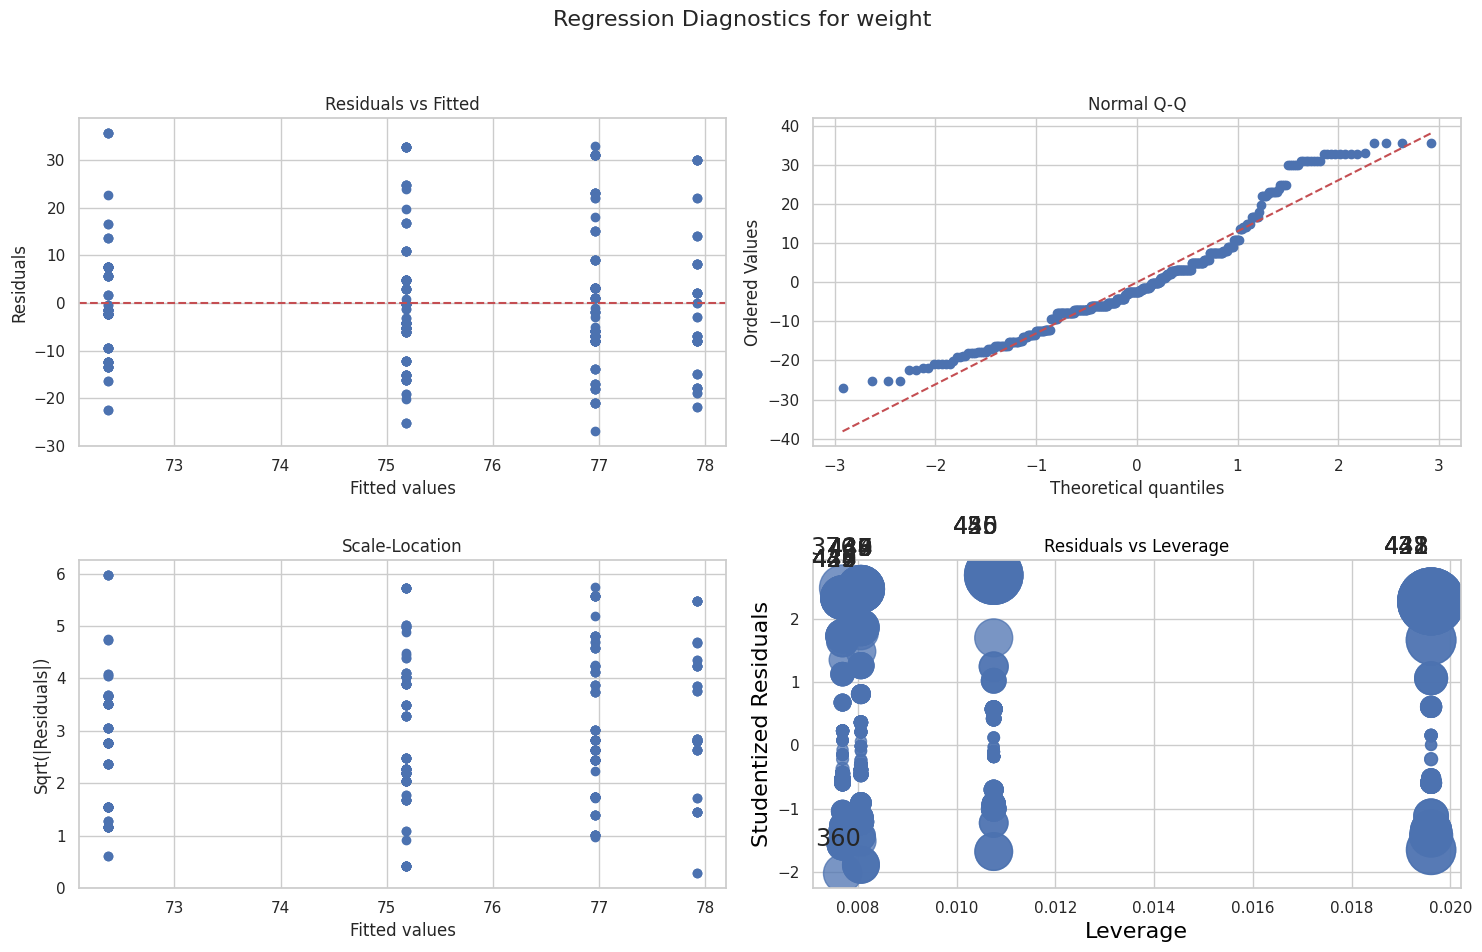

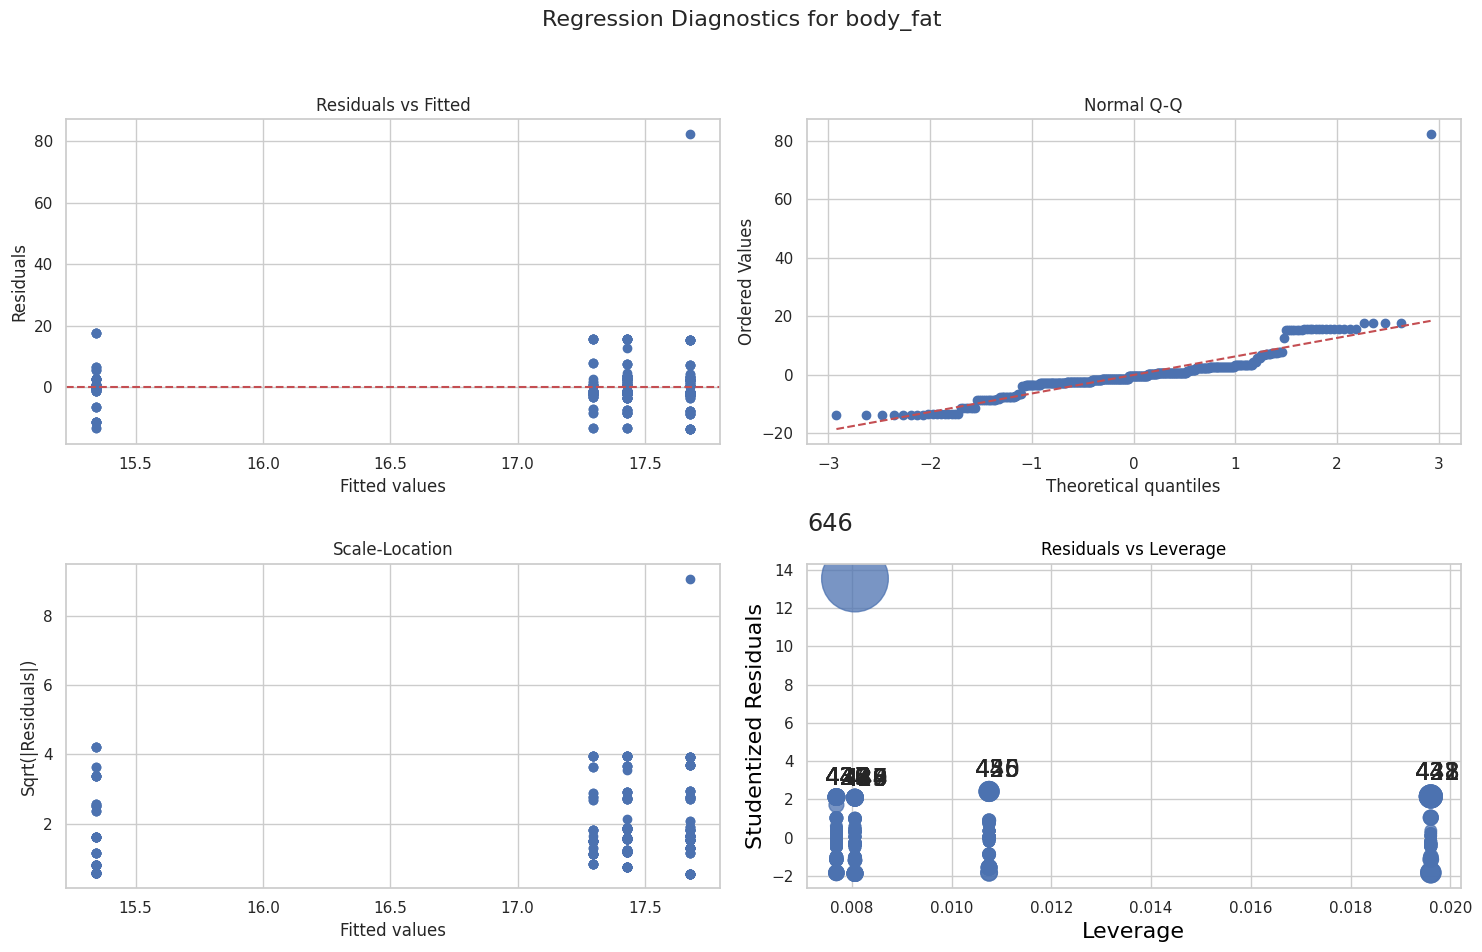

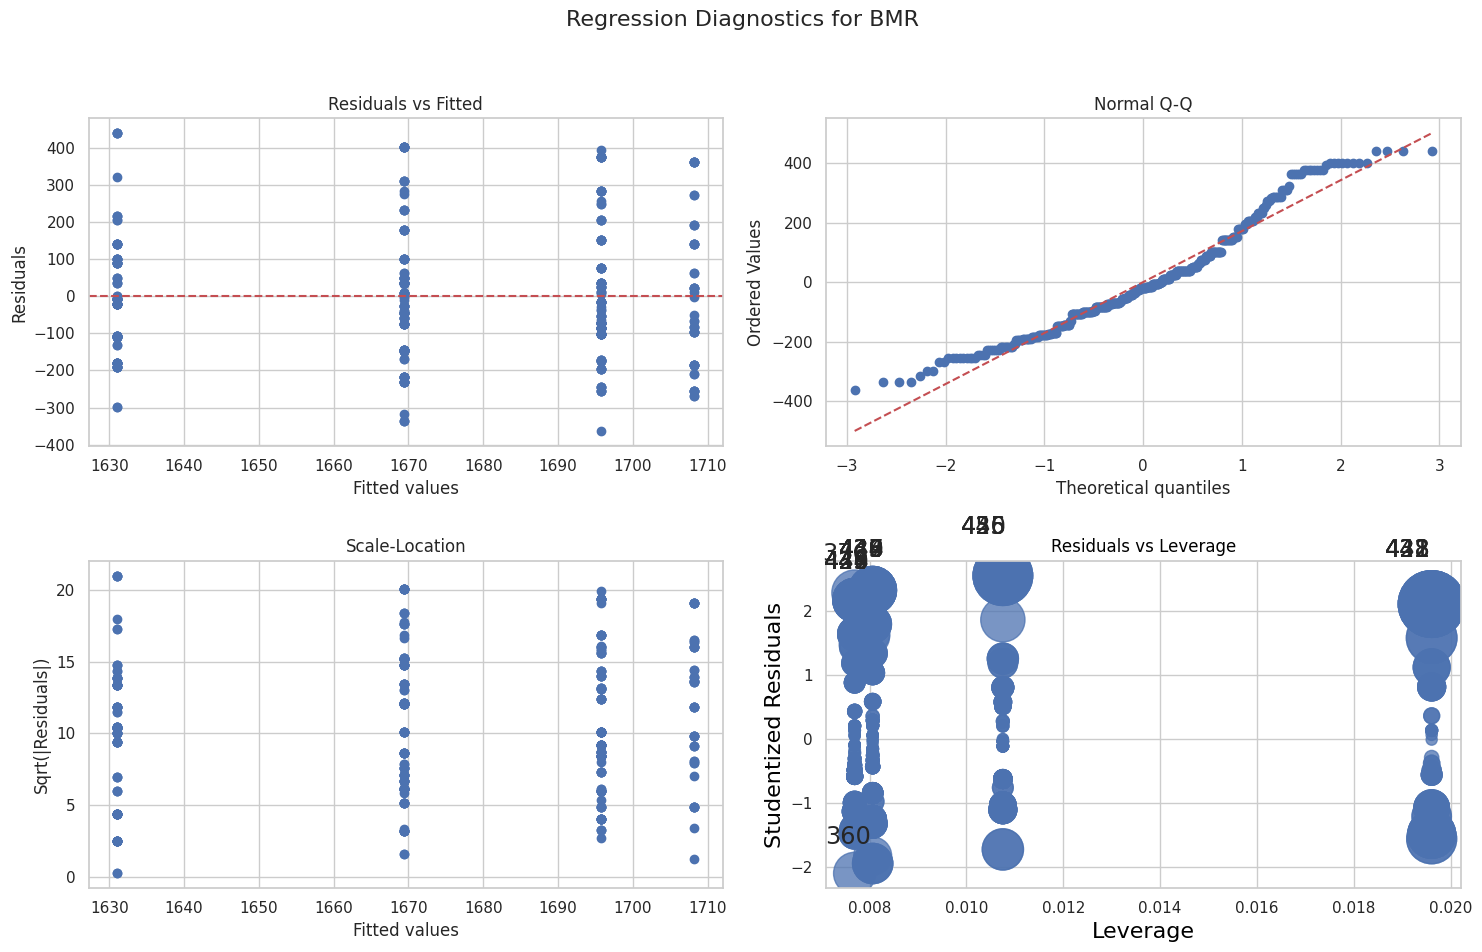

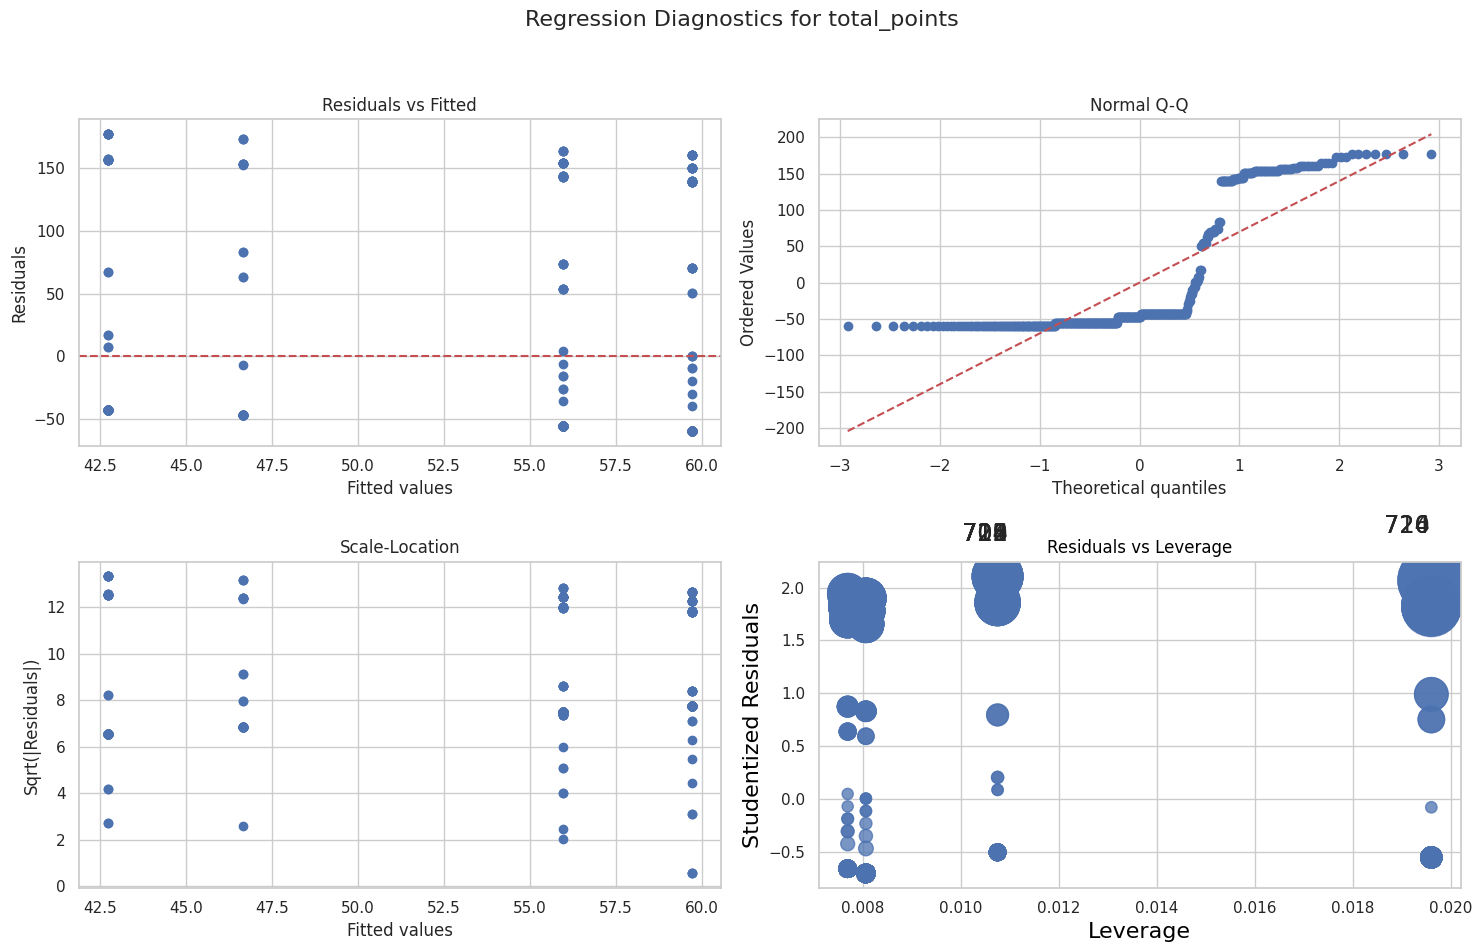

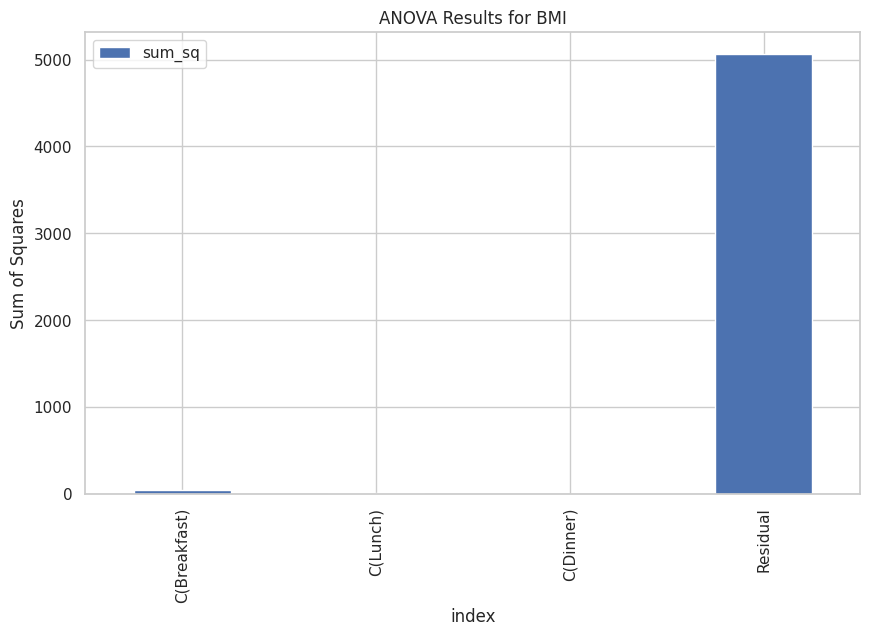

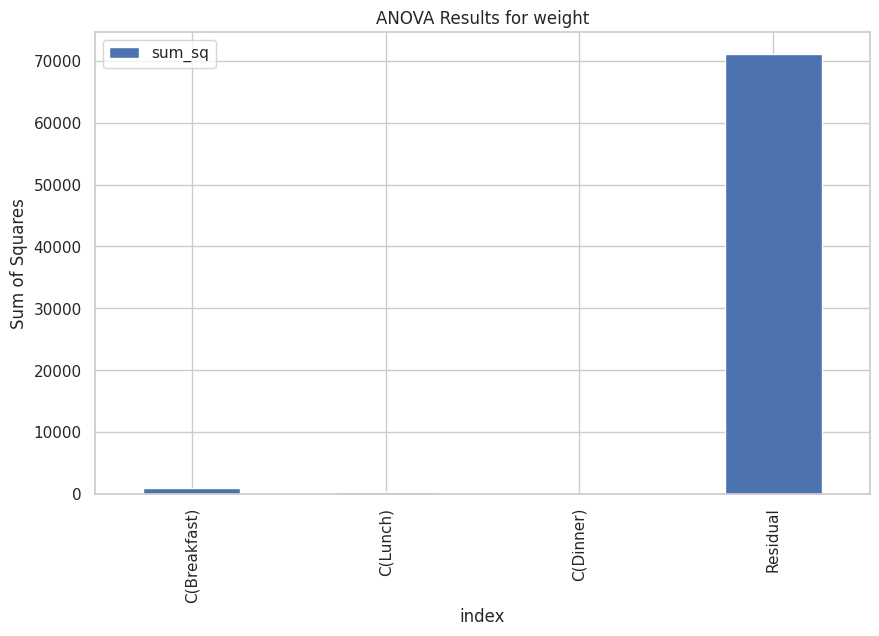

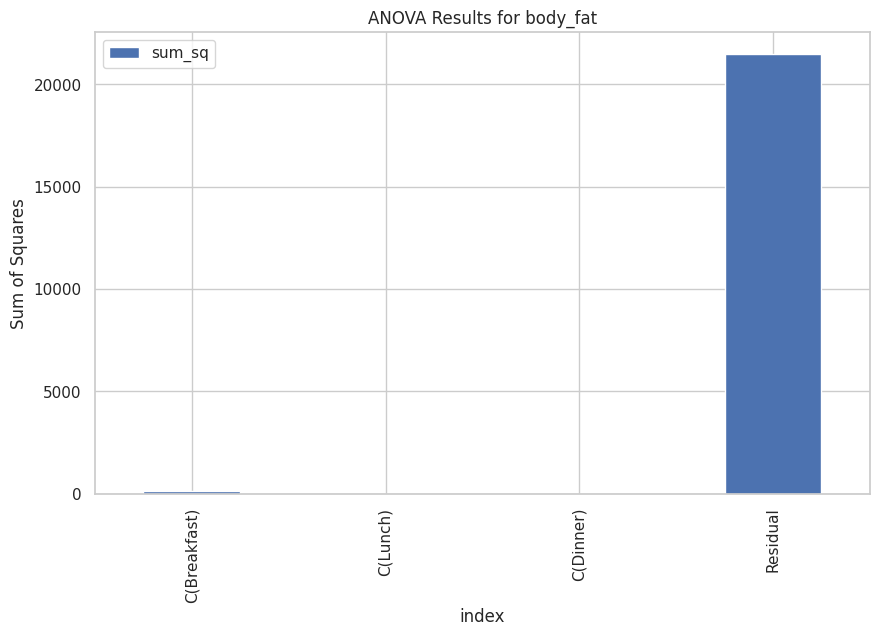

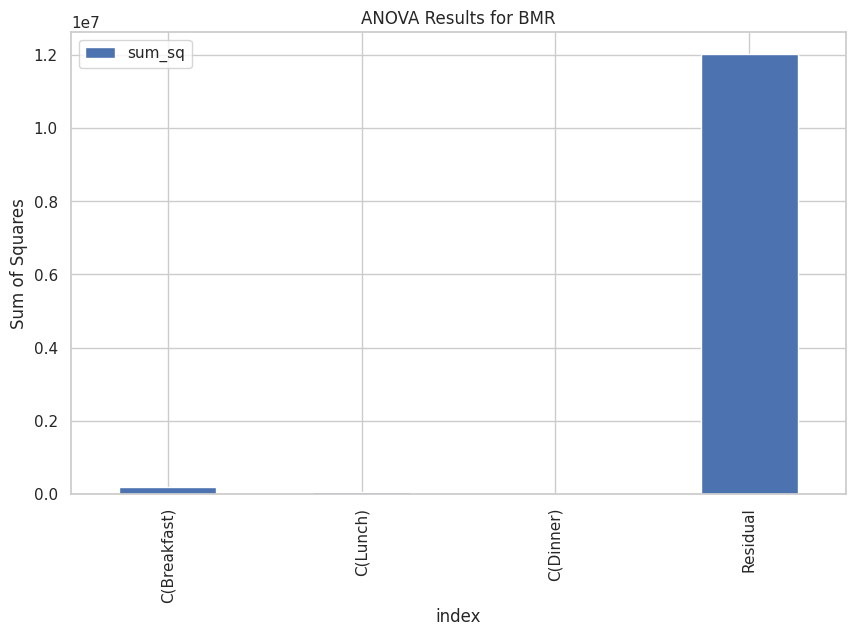

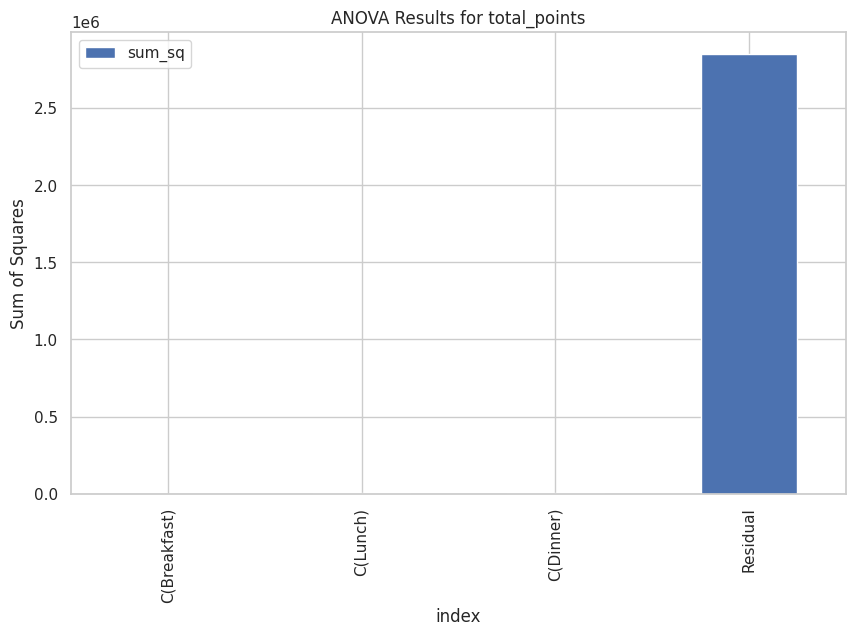

In [ ]:
import scipy.stats as stats

# Plotting Regression Results
for dv in dependent_vars:
    if dv in merged_df_clean.columns:
        y = merged_df_clean[dv].astype(float)
        X = sm.add_constant(merged_df_clean[independent_vars].astype(float))
        model = sm.OLS(y, X).fit()

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Regression Diagnostics for {dv}', fontsize=16)

        # Residuals vs Fitted
        axes[0, 0].scatter(model.fittedvalues, model.resid)
        axes[0, 0].axhline(0, linestyle='dashed', color='r')
        axes[0, 0].set_title('Residuals vs Fitted')
        axes[0, 0].set_xlabel('Fitted values')
        axes[0, 0].set_ylabel('Residuals')

        # Q-Q plot using scipy.stats.probplot
        stats.probplot(model.resid, dist="norm", plot=axes[0, 1])
        axes[0, 1].get_lines()[1].set_color('r')
        axes[0, 1].get_lines()[1].set_linestyle('dashed')
        axes[0, 1].set_title('Normal Q-Q')

        # Scale-Location
        axes[1, 0].scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
        axes[1, 0].set_title('Scale-Location')
        axes[1, 0].set_xlabel('Fitted values')
        axes[1, 0].set_ylabel('Sqrt(|Residuals|)')

        # Residuals vs Leverage
        sm.graphics.influence_plot(model, ax=axes[1, 1], criterion="cooks")
        axes[1, 1].set_title('Residuals vs Leverage')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Plotting ANOVA Results
for dv in dependent_vars:
    if dv in merged_df_clean.columns:
        anova_df = get_anova_results(dv)
        anova_df.set_index('index', inplace=True)
        columns_to_plot = [col for col in ['sum_sq', 'mean_sq'] if col in anova_df.columns]
        if columns_to_plot:
            anova_df[columns_to_plot].plot(kind='bar', figsize=(10, 6), title=f'ANOVA Results for {dv}')
            plt.ylabel('Sum of Squares')
            plt.show()




## Comparative Analysis

ANOVA Results
                 index        sum_sq     df         F    PR(>F)  \
0   C(Meal_Time_Group)  2.755323e+02    2.0  0.713486  0.490252   
1             Residual  1.511886e+05  783.0       NaN       NaN   
2   C(Meal_Time_Group)  9.397932e+02    2.0  1.721518  0.179470   
3             Residual  2.137236e+05  783.0       NaN       NaN   
4   C(Meal_Time_Group)  3.354722e+02    2.0  3.053950  0.048453   
5             Residual  1.889396e+04  344.0       NaN       NaN   
6   C(Meal_Time_Group)  1.952927e+05    2.0  2.621767  0.073312   
7             Residual  2.916243e+07  783.0       NaN       NaN   
8   C(Meal_Time_Group)  1.015359e+00    2.0  0.834151  0.434629   
9             Residual  4.765483e+02  783.0       NaN       NaN   
10  C(Meal_Time_Group)  1.116182e+04    2.0  0.345186  0.708197   
11            Residual  1.265942e+07  783.0       NaN       NaN   

              Health Metric  
0                       BMI  
1                       BMI  
2                    wei

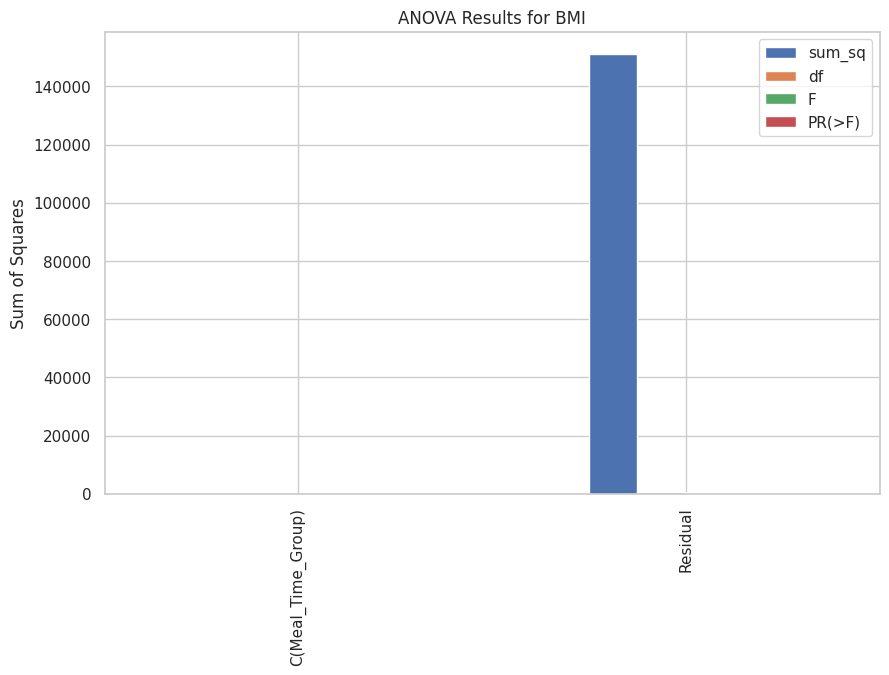

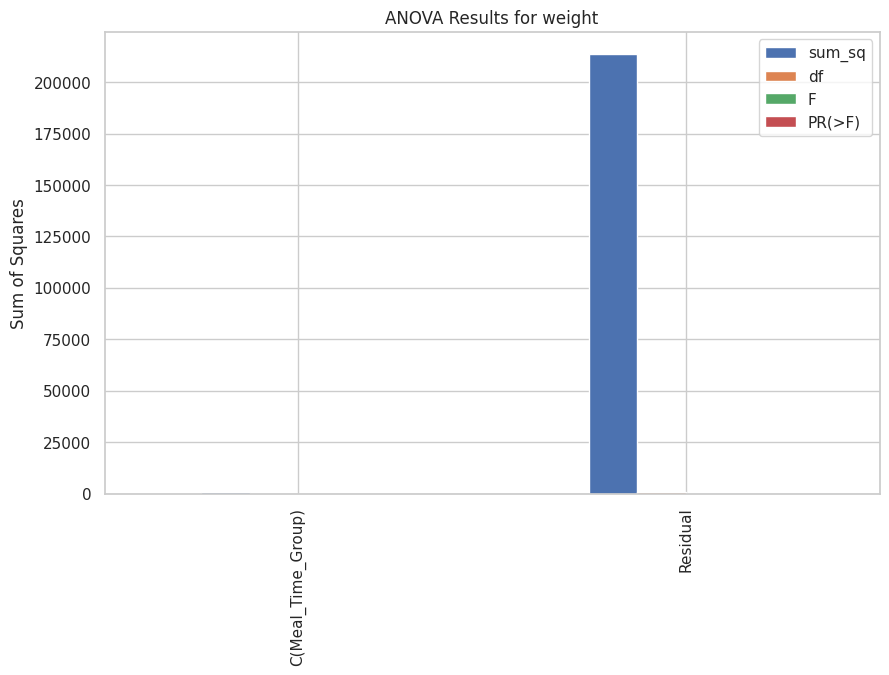

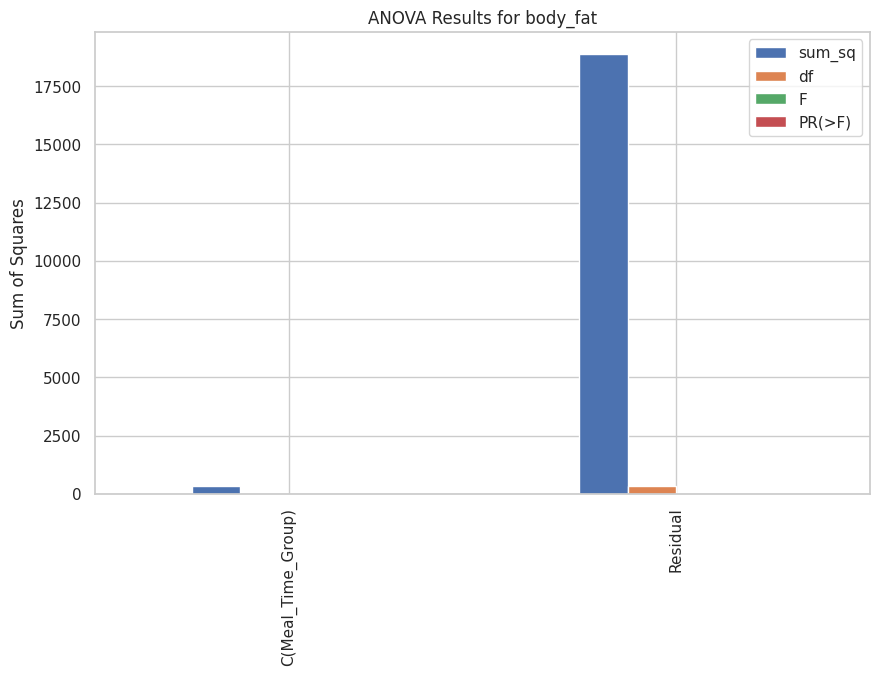

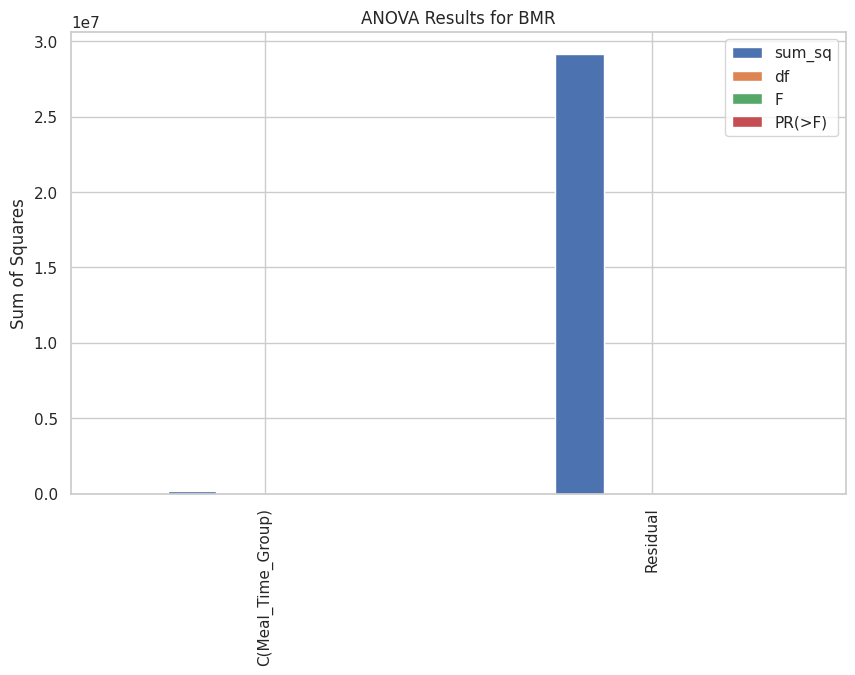

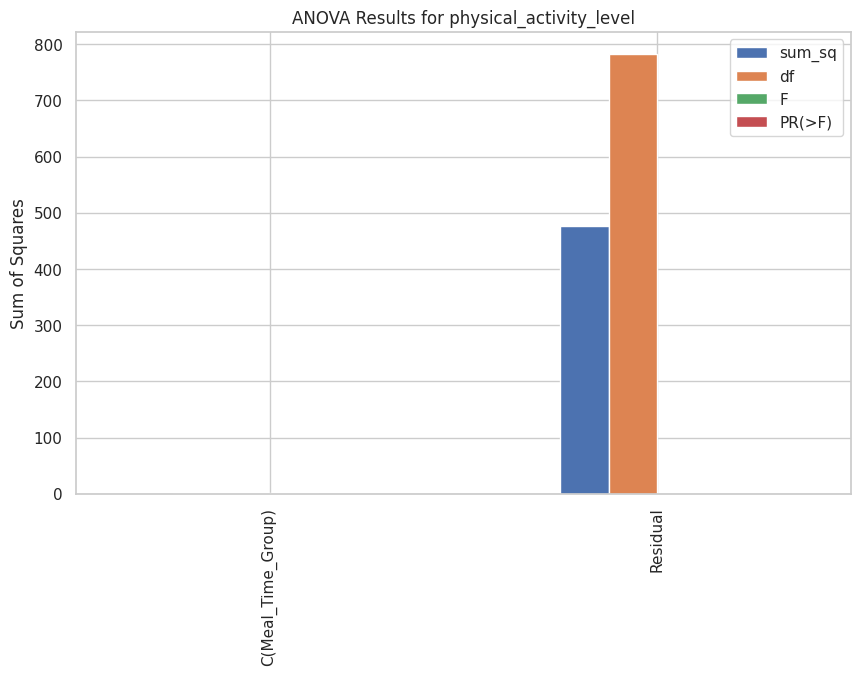

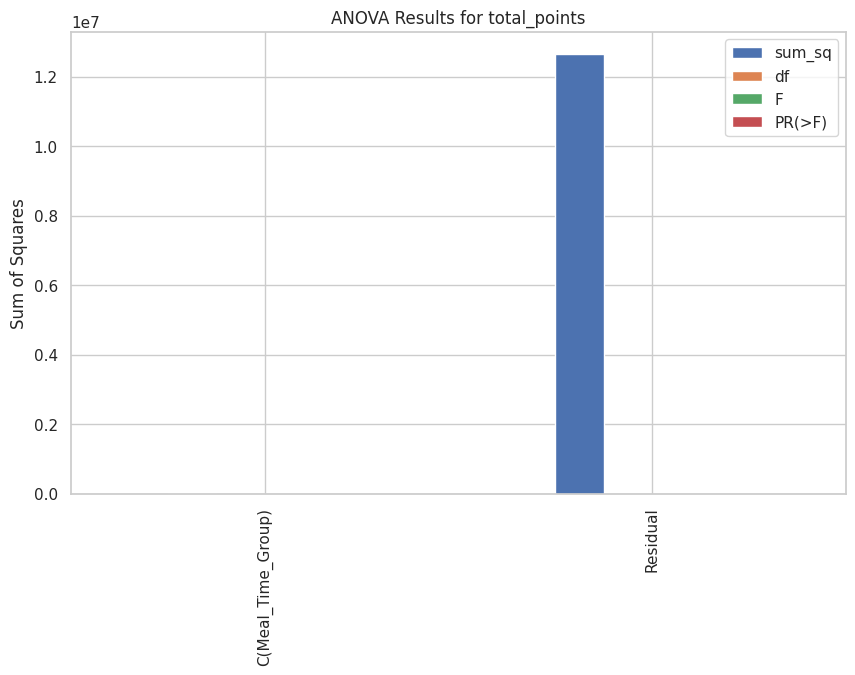

In [ ]:
# Convert necessary columns to numeric, forcing errors to NaN
cols_to_convert = ['BMI', 'weight', 'body_fat', 'BMR', 'physical_activity_level', 'total_points']
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a column to classify users into groups based on their meal times
def classify_meal_time(row):
    if row['Breakfast'] > 0:
        return 'Morning Eaters'
    elif row['Lunch'] > 0:
        return 'Lunch Eaters'
    elif row['Dinner'] > 0:
        return 'Dinner Eaters'
    else:
        return 'Other'

merged_df['Meal_Time_Group'] = merged_df.apply(classify_meal_time, axis=1)

# Filter out the 'Other' group if needed
merged_df = merged_df[merged_df['Meal_Time_Group'] != 'Other']


# Define the health metrics
health_metrics = ['BMI', 'weight', 'body_fat', 'BMR', 'physical_activity_level', 'total_points']

# Perform ANOVA to compare means across different food timing groups
anova_results = pd.DataFrame()
for metric in health_metrics:
    model = ols(f'{metric} ~ C(Meal_Time_Group)', data=merged_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table['Health Metric'] = metric
    anova_results = pd.concat([anova_results, anova_table])

anova_results.reset_index(inplace=True)

# Display ANOVA results
print("ANOVA Results")
print(anova_results)

# Plotting ANOVA Results
for metric in health_metrics:
    model = ols(f'{metric} ~ C(Meal_Time_Group)', data=merged_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table.plot(kind='bar', figsize=(10, 6), title=f'ANOVA Results for {metric}')
    plt.ylabel('Sum of Squares')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Cluster Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

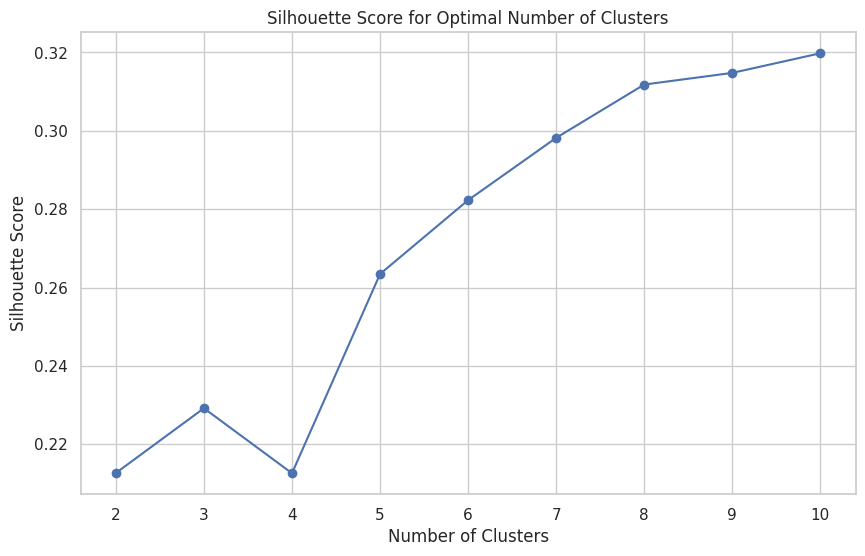

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Assignments
     user_id  Cluster
0          3        3
1          3        2
2          3        2
3          3        4
4          3        2
..       ...      ...
888      136        1
889      136        1
890      136        1
891      137        3
892      137        3

[786 rows x 2 columns]


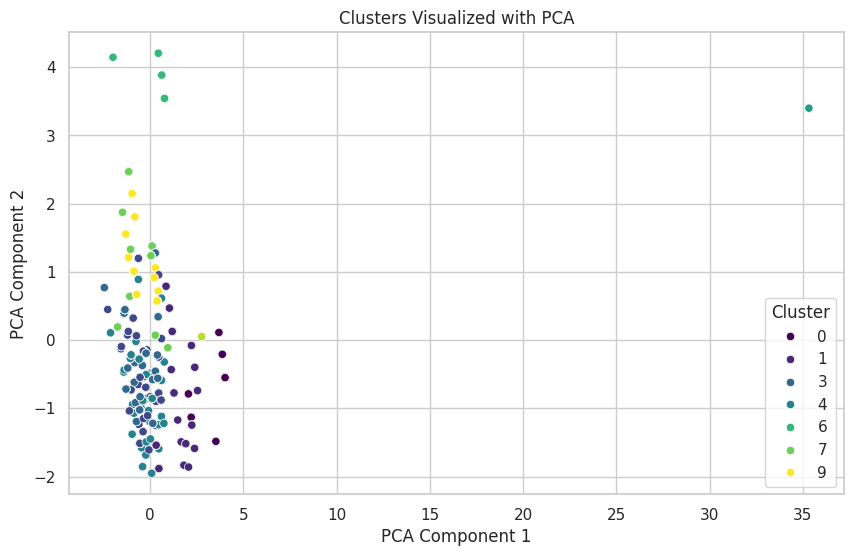

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Merge the DataFrames on 'user_id'
merged_df = pd.merge(user_profile_df, output_dataset_df, on='user_id')

# Convert necessary columns to numeric, forcing errors to NaN
cols_to_convert = ['age', 'sex', 'physical_activity_level', 'weight', 'height', 'body_fat', 'BMI', 'BMR', 'total_points']
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a column to classify users into groups based on their meal times
def classify_meal_time(row):
    if row['Breakfast'] > 0:
        return 'Morning Eaters'
    elif row['Lunch'] > 0:
        return 'Lunch Eaters'
    elif row['Dinner'] > 0:
        return 'Dinner Eaters'
    else:
        return 'Other'

merged_df['Meal_Time_Group'] = merged_df.apply(classify_meal_time, axis=1)

# Filter out the 'Other' group if needed
merged_df = merged_df[merged_df['Meal_Time_Group'] != 'Other']

# Convert 'Meal_Time_Group' to dummy variables
meal_time_dummies = pd.get_dummies(merged_df['Meal_Time_Group'], drop_first=True)

# Select the features for clustering
features = ['age', 'sex', 'physical_activity_level', 'weight', 'height', 'body_fat', 'BMI', 'BMR', 'total_points']
features.extend(meal_time_dummies.columns)

# Concatenate dummy variables with the main dataframe
merged_df = pd.concat([merged_df, meal_time_dummies], axis=1)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(merged_df[features])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the optimal number of clusters using the silhouette score
range_n_clusters = list(range(2, 11))
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal number of clusters and fit the final model
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg)]
kmeans = KMeans(n_clusters=optimal_clusters)
merged_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster assignments
print("Cluster Assignments")
print(merged_df[['user_id', 'Cluster']])

# Visualize the clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
merged_df['PCA1'] = principal_components[:, 0]
merged_df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


## Correlation Analysis

Correlation Analysis Results
              Health Metric     Food Timing Correlation Type  Correlation  \
0                       BMI    Lunch Eaters   Point-Biserial    -0.008494   
1                       BMI  Morning Eaters   Point-Biserial    -0.095189   
2                    weight    Lunch Eaters   Point-Biserial     0.004660   
3                    weight  Morning Eaters   Point-Biserial    -0.124879   
4                  body_fat    Lunch Eaters   Point-Biserial     0.071899   
5                  body_fat  Morning Eaters   Point-Biserial    -0.131320   
6                       BMR    Lunch Eaters   Point-Biserial     0.001484   
7                       BMR  Morning Eaters   Point-Biserial    -0.133541   
8   physical_activity_level    Lunch Eaters   Point-Biserial    -0.055573   
9   physical_activity_level  Morning Eaters   Point-Biserial     0.071206   
10             total_points    Lunch Eaters   Point-Biserial     0.051952   
11             total_points  Morning Eaters   P

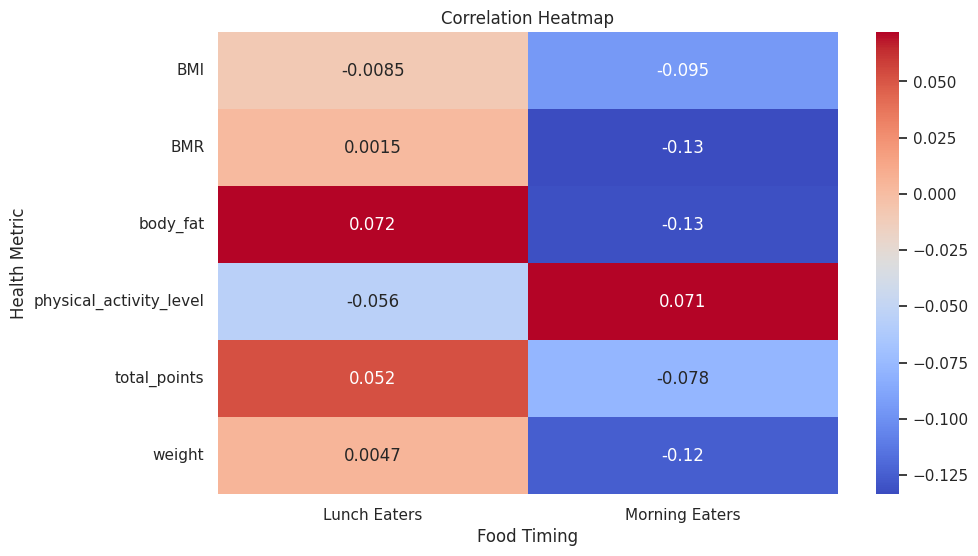

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the DataFrames on 'user_id'
merged_df = pd.merge(user_profile_df, output_dataset_df, on='user_id')

# Convert necessary columns to numeric, forcing errors to NaN
cols_to_convert = ['BMI', 'weight', 'body_fat', 'BMR', 'physical_activity_level', 'total_points']
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a column to classify users into groups based on their meal times
def classify_meal_time(row):
    if row['Breakfast'] > 0:
        return 'Morning Eaters'
    elif row['Lunch'] > 0:
        return 'Lunch Eaters'
    elif row['Dinner'] > 0:
        return 'Dinner Eaters'
    else:
        return 'Other'

merged_df['Meal_Time_Group'] = merged_df.apply(classify_meal_time, axis=1)

# Filter out the 'Other' group if needed
merged_df = merged_df[merged_df['Meal_Time_Group'] != 'Other']

# Convert 'Meal_Time_Group' to categorical variables
meal_time_dummies = pd.get_dummies(merged_df['Meal_Time_Group'], drop_first=True)
merged_df = pd.concat([merged_df, meal_time_dummies], axis=1)

# Define the health metrics and food timing variables
health_metrics = ['BMI', 'weight', 'body_fat', 'BMR', 'physical_activity_level', 'total_points']
food_timing = meal_time_dummies.columns

# Drop rows with NaN values
merged_df.dropna(subset=health_metrics, inplace=True)

# Function to calculate correlation
def calculate_correlations(df, health_metrics, food_timing):
    correlation_results = []

    for health_metric in health_metrics:
        for timing in food_timing:
            if df[health_metric].dtype in [np.float64, np.int64]:
                # Continuous vs. Categorical (point-biserial correlation)
                corr, p_value = pointbiserialr(df[timing], df[health_metric])
                correlation_results.append((health_metric, timing, 'Point-Biserial', corr, p_value))
            else:
                # For other types, you can include Spearman's rank correlation or other methods
                corr, p_value = spearmanr(df[timing], df[health_metric])
                correlation_results.append((health_metric, timing, 'Spearman', corr, p_value))

    return pd.DataFrame(correlation_results, columns=['Health Metric', 'Food Timing', 'Correlation Type', 'Correlation', 'P-value'])

# Calculate the correlations
correlation_df = calculate_correlations(merged_df, health_metrics, food_timing)

# Display the correlation results
print("Correlation Analysis Results")
print(correlation_df)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df.pivot(index='Health Metric', columns='Food Timing', values='Correlation'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Statistical Analysis

In [ ]:
# TODO